In [133]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Load environment variabless
from dotenv import load_dotenv
from pathlib import Path

# Load .env file from general directory
env_path = Path('../../general/.env')
load_dotenv(env_path);

In [134]:
# Get path from environment variables
path_prop = os.getenv('path_prop')

# Use the path from environment
path = path_prop

In [135]:
# read all csv files in the folder
all_files = glob.glob(os.path.join(path_prop, "*.csv"))

# create an empty list to store dataframes
dfs = []

# loop through all files and read them into a dataframe
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=';')
    dfs.append(df)

# concatenate all dataframes into one
df = pd.concat(dfs, axis=0, ignore_index=True)

# drop duplicates
df = df.drop_duplicates()

# df.tail(3)

In [136]:
df.shape

(15830, 23)

In [137]:
df.tail(5)

,Ticket,Apri,Tipologia,Volume,Simbolo,Prezzo,SL,TP,Chiudi,Prezzo.1,...,Pips,Duratadeltradeinsecondi,Account_Type,Account_Amount,Profit_pct,Month,Year,Asset,Prop,Day
18754,36310300,2025-10-09 16:35:00,BUY,10.00,NVDA,191.71,184.26,201.69,2025-10-10 22:54:14,184.25,...,-7.5,109154.0,Funded,50000,-0.15,10,2025,Stocks,FTMO,9
18755,36319546,2025-10-09 17:30:00,SELL,5.00,BABA,174.02,180.62,164.44,2025-10-10 18:18:57,164.42,...,9.6,89337.0,Funded,50000,0.10,10,2025,Stocks,FTMO,9
18756,36126114,2025-10-06 22:56:21,BUY,4.00,RACE,490.94,466.0,530.0,2025-10-09 16:35:00,419.88,...,-71.1,236319.0,Funded,50000,-0.57,10,2025,Stocks,FTMO,6
18757,35696582,2025-09-25 21:30:02,SELL,4.00,BABA,173.98,182.24,164.06,2025-09-30 16:39:18,182.24,...,0.0,414556.0,Funded,50000,-0.07,9,2025,Stocks,FTMO,25
18758,35575136,2025-09-23 23:04:57,BUY,0.01,EURUSD,1.18168,1.16,0.0,2025-09-23 23:05:12,1.18163,...,0.0,15.0,Funded,50000,-0.00,9,2025,Forex,FTMO,23


### Year Filter

In [138]:
# # Add year filter on column df.Year, to filter current year
# current_year = pd.Timestamp.now().year
# df = df[df['Year'] < current_year]

# As alternative, filter for specific year, e.g., 2025
df = df[df['Year'] == 2025]

In [139]:
df.columns

Index(['Ticket', 'Apri', 'Tipologia', 'Volume', 'Simbolo', 'Prezzo', 'SL',
       'TP', 'Chiudi', 'Prezzo.1', 'Swap', 'Commissioni', 'Profitto', 'Pips',
       'Duratadeltradeinsecondi', 'Account_Type', 'Account_Amount',
       'Profit_pct', 'Month', 'Year', 'Asset', 'Prop', 'Day'],
      dtype='object')

In [140]:
# from column Ticket, drop duplicates and keep the first occurrence
# Is required especially for 5%, FNEXT and MyFX where there is no account reset
df = df.drop_duplicates(subset=['Ticket'], keep='first')

# drop Ticket
# df = df.drop(columns=['Ticket'])

In [141]:
df.shape

(8049, 23)

In [142]:
# 'Tipologia' column, uppercase
df['Tipologia'] = df['Tipologia'].str.upper()

# # Check 'Tipologia' column for unique values
# unique_values = df['Tipologia'].unique()
# unique_values

In [143]:
# rename values in column Simbolo
df['Simbolo'] = df['Simbolo'].replace({'US100.cash': 'US100',
                                        'NAS100': 'US100', 
                                       'UK100.cash' : 'UK100',
                                        'FRA40.cash': 'FRA40',
                                        'USOIL.cash': 'USOIL',
                                        'USOUSD': 'USOIL',
                                        'XBRUSD': 'USOIL',
                                        'UKOIL.cash': 'UKOIL',
                                       'US500.cash': 'US500',
                                        'SP500': 'US500', 
                                       'US30.cash': 'US30', 
                                       'US2000.cash': 'US2000', 
                                       'SPX500': 'US500', 
                                       'NDX100': 'US100',
                                        'SPN35.cash': 'SPN35',
                                       'GER30': 'GER40',
                                        'DAX40': 'GER40',
                                        'JP225.cash': 'JP225',
                                       'GER40.cash': 'GER40'})

In [144]:
# unique values column Simbolo
# list of assets
df['Simbolo'].unique()

array(['BTCUSD', 'US30', 'CADJPY', 'AUDJPY', 'USDCAD', 'EURJPY', 'US100',
       'US500', 'WMT', 'NVDA', 'EURUSD', 'XAUUSD', 'NFLX', 'V', 'GBPJPY',
       'AMZN', 'US2000', 'UKOIL', 'GER40', 'NZDJPY', 'JP225', 'CHFJPY',
       'EUSTX50', 'ETHUSD', 'FRA40', 'AUDCHF', 'UK100', 'USDJPY', 'MSFT',
       'BABA', 'USDCHF', 'TSLA', 'GOOG', 'META', 'RACE', 'GBPNZD', 'T',
       'JPN225', 'SPN35', 'DBKGn', 'ZM', 'VOWG_p', 'BAC', 'AAPL', 'LVMH',
       'ALVG', 'BNBUSD', 'SOLUSD'], dtype=object)

In [145]:
# Calculate the total profit for each symbol
best_simbol = df.groupby('Simbolo')['Profitto'].sum().sort_values(ascending=False).round(2) 

# Convert the result to a DataFrame
best_simbol = best_simbol.reset_index()

# Rename the columns
best_simbol.columns = ['Simbolo', 'Profitto']

# Display the result
best_simbol.head(10)

,Simbolo,Profitto
0,US100,25925.39
1,XAUUSD,7760.65
2,GER40,4138.57
3,US500,3976.63
4,NVDA,2245.06
5,CHFJPY,949.15
6,AMZN,615.57
7,AAPL,512.04
8,SPN35,386.70
9,US2000,323.62


In [146]:
# check Profitto for Simbolo 'WMT'
profitto_ = best_simbol[best_simbol['Simbolo'] == 'V']
profitto_

,Simbolo,Profitto
46,V,-2702.98


In [147]:
# check Profitto for Simbolo 'WMT'
profitto2_ = best_simbol[best_simbol['Simbolo'] == 'AMZN']
profitto2_

,Simbolo,Profitto
6,AMZN,615.57


In [148]:
# worst symbols
worst_simbol =  best_simbol.sort_values(by='Profitto', ascending=True).head(10)
worst_simbol

,Simbolo,Profitto
47,TSLA,-3951.11
46,V,-2702.98
45,USDCHF,-2403.87
44,BTCUSD,-2338.67
43,USDCAD,-2085.71
42,MSFT,-1817.17
41,US30,-1583.28
40,RACE,-1281.54
39,EURUSD,-1121.19
38,BNBUSD,-1024.37


In [149]:
# Calculate total profit from column 'Profitto'
total_profit = df['Profitto'].sum().round(2)

# Display the result
total_profit

np.float64(21698.33)

In [150]:
# Calculate cumulative profit for each Asset
cumulative_profit_asset = df.groupby('Asset')['Profitto'].sum().reset_index()

# Rename the columns
cumulative_profit_asset.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset = cumulative_profit_asset.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset

,Asset,Cumulative_Profit
3,Indexes,32705.53
0,Commodities,7751.03
1,Crypto,-3692.12
2,Forex,-5893.49
4,Stocks,-9172.62


### Unknown Analysis in column Asset

In [151]:
# # Fix Unknown in column Asset

# # check Unknown in column Asset
# df[df['Asset'] == 'Unknown']

# """
# df.Simbolo == 'GBPNZD' -> df.Asset == 'Forex'
# df.Simbolo == 'T' -> df.Asset == 'Stocks'
# """
# # fix Unknown in column Asset
# df.loc[df['Simbolo'] == 'GBPNZD', 'Asset'] = 'Forex'
# df.loc[df['Simbolo'] == 'T', 'Asset'] = 'Stocks'

In [152]:
# # check df['Asset'] == Unknown
# df[df['Asset'] == 'Unknown']

In [153]:
# First method to calculate the average profit per trade for each symbol
best_simbol_avg = df.groupby('Simbolo')['Profitto'].mean().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_avg = best_simbol_avg.reset_index()

# Rename the columns
best_simbol_avg.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg.head(10)

,Simbolo,Average_Profit
0,LVMH,94.73
1,SPN35,77.34
2,NVDA,27.72
3,XAUUSD,25.12
4,AAPL,18.29
5,GBPNZD,14.87
6,GER40,14.57
7,US100,12.94
8,SOLUSD,8.80
9,US2000,3.34


In [154]:
# Second method to calculate the average profit per trade for each symbol

# Calculate the number of trades for each symbol
trades_count = df.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)
trades_count.head(10)

# Calculate the profit for each symbol
best_simbol_avg2 = best_simbol.set_index('Simbolo')['Profitto'] / trades_count
best_simbol_avg2.sort_values(ascending=False).round(2).head(10)

# Convert the result to a DataFrame
best_simbol_avg2 = best_simbol_avg2.reset_index()

# Rename the columns
best_simbol_avg2.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg2.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit
23,LVMH,94.730000
31,SPN35,77.340000
27,NVDA,27.716790
46,XAUUSD,25.115372
0,AAPL,18.287143
18,GBPNZD,14.865000
19,GER40,14.572430
36,US100,12.936821
30,SOLUSD,8.803333
37,US2000,3.336289


In [155]:
# Convert trades_count to DataFrame
trades_count_df = trades_count.reset_index()

# Rename the columns
trades_count_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df = pd.merge(best_simbol_avg, trades_count_df, on='Simbolo')

# Display the merged DataFrame
merged_df.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
0,LVMH,94.73,1
1,SPN35,77.34,5
2,NVDA,27.72,81
3,XAUUSD,25.12,309
4,AAPL,18.29,28
5,GBPNZD,14.87,2
6,GER40,14.57,284
7,US100,12.94,2004
8,SOLUSD,8.80,3
9,US2000,3.34,97


In [156]:
# Create a copy of the dataframe
# df_100 will be the dataset used as a reference for the calculations 
# (virtual balance 100k USD)

# With this scenario, we will simulate how all strategies applied to the 100k 
# account would have performed

df_100 = df.copy()

# Add the column Profitto_100 with calculated values 
# (virtual profit on 100k USD balance)
df_100['Profitto_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Profitto'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Profitto'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Profitto'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Profitto'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Profitto'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Profitto'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Profitto'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

In [157]:
# Check the new column and profitto column
df_100[['Profitto', 'Account_Amount', 'Profitto_100']].sample(10)

,Profitto,Account_Amount,Profitto_100
13676,53.16,100000,53.16
16439,94.45,100000,94.45
8491,6.58,100000,6.58
5169,0.17,50000,0.34
11836,144.26,100000,144.26
10935,-0.07,50000,-0.14
5077,-72.56,100000,-72.56
13819,-106.95,100000,-106.95
8417,-33.58,100000,-33.58
10251,20.04,100000,20.04


### Trades Commissions Analysis

In [158]:
# Add the column Profitto_100 with calculated values 
# (virtual profit on 100k USD balance)
df_100['Swap_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Swap'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Swap'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Swap'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Swap'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Swap'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Swap'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Swap'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

# Add the column Profitto_100 with calculated values (virtual profit on 100k USD balance)
df_100['Commissioni_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Commissioni'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Commissioni'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Commissioni'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Commissioni'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Commissioni'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Commissioni'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Commissioni'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

# Add column 'Tot_Commissioni_100' as sum of 'Commissioni_100' and 'Swap_100'
df_100['Tot_Commissioni_100'] = df_100['Commissioni_100'] + df_100['Swap_100']

In [159]:
# Check columns
df_100[['Commissioni', 'Swap', 'Account_Amount','Commissioni_100', 'Swap_100', 'Tot_Commissioni_100']].sample(10)

,Commissioni,Swap,Account_Amount,Commissioni_100,Swap_100,Tot_Commissioni_100
16024,0.00,0.00,20000,0.00,0.00,0.00
14165,0.00,-4.00,100000,0.00,-4.00,-4.00
9598,0.00,0.00,100000,0.00,0.00,0.00
10339,0.00,0.00,100000,0.00,0.00,0.00
1421,-0.04,-0.01,20000,-0.20,-0.05,-0.25
18415,-0.05,-2.96,50000,-0.10,-5.92,-6.02
1431,-0.04,-0.01,20000,-0.20,-0.05,-0.25
8439,-0.08,0.00,100000,-0.08,0.00,-0.08
8838,-0.04,0.00,100000,-0.04,0.00,-0.04
5153,0.00,0.00,50000,0.00,0.00,0.00


In [160]:
# drop Commissioni_100	Swap_100
df_100 = df_100.drop(columns=['Commissioni_100', 'Swap_100'])

# Column Profitto_100 is sum of Profitto_100 and Tot_Commissioni_100
df_100['Profitto_100'] = df_100['Profitto_100'] + df_100['Tot_Commissioni_100']

In [258]:
# total amount paid in commissions and swap
total_commissions_100 = -df_100['Tot_Commissioni_100'].sum().round(2)

# print total amount paid in commissions and swap
print('Total commissions and swap paid (USD):', total_commissions_100)

Total commissions and swap paid (USD): 18117.15


### From here on, analysis of the trade commissions data is completed.

In [161]:
# drop rows where Profitto_100 is in range -1/1$
# it decreases the average profit for trades made mostly manually 
# to check the account performance
# df_100 = df_100[(df_100['Profitto_100'] < -1) & (df_100['Profitto_100'] > 1)]

In [162]:
# rename Account_Amount_100 to Profitto_100
# df_100.rename(columns={'Account_Amount_100': 'Profitto_100'}, inplace=True)

In [163]:
# Calculate the total profit for each symbol of df_100
best_simbol_100 = df_100.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_100 = best_simbol_100.reset_index()

# Rename the columns
best_simbol_100.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_100.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,US100,25086.33
1,XAUUSD,7406.62
2,GER40,3566.14
3,US500,3207.20
4,NVDA,1605.47
5,AAPL,955.58
6,CHFJPY,882.32
7,SPN35,743.66
8,AMZN,516.48
9,US2000,228.29


In [164]:
# worst symbols of df_100
best_simbol_100.tail(10)

,Simbolo,Profitto ($)
38,RACE,-1589.28
39,BNBUSD,-2205.56
40,USDCHF,-2281.52
41,MSFT,-2289.40
42,US30,-3144.85
43,NFLX,-3258.39
44,V,-3869.72
45,USDCAD,-3989.95
46,BTCUSD,-4477.08
47,TSLA,-4546.57


### List of the best symbols

In [165]:
# df forex from df_100 where Asset == Forex
df_forex = df_100[df_100['Asset'] == 'Forex']

# Calculate the total profit for each symbol of df_forex
best_simbol_forex = df_forex.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_forex = best_simbol_forex.reset_index()

# Rename the columns
best_simbol_forex.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_forex.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,CHFJPY,882.32
1,GBPNZD,29.05
2,USDJPY,-0.22
3,AUDCHF,-0.22
4,AUDJPY,-75.30
5,GBPJPY,-230.94
6,CADJPY,-344.30
7,NZDJPY,-394.10
8,EURJPY,-410.67
9,EURUSD,-1162.68


In [166]:
# worst_simbol_forex
worst_simbol_forex = best_simbol_forex.sort_values(by='Profitto ($)', ascending=True).head(10)
worst_simbol_forex

,Simbolo,Profitto ($)
11,USDCAD,-3989.95
10,USDCHF,-2281.52
9,EURUSD,-1162.68
8,EURJPY,-410.67
7,NZDJPY,-394.10
6,CADJPY,-344.30
5,GBPJPY,-230.94
4,AUDJPY,-75.30
3,AUDCHF,-0.22
2,USDJPY,-0.22


In [167]:
# virtual profit from all the bots

# Calculate total profit from column 'Profitto_100'
total_profit_100 = df_100['Profitto_100'].sum().round(2)

# Display the result
total_profit_100

np.float64(6465.12)

In [168]:
# sum of profits for each asset
cumulative_profit_asset_100 = df_100.groupby('Asset')['Profitto_100'].sum().reset_index()

# Rename the columns
cumulative_profit_asset_100.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset_100 = cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False).head(10)

,Asset,Cumulative_Profit
3,Indexes,29427.79
0,Commodities,7397.00
1,Crypto,-7191.54
2,Forex,-7978.53
4,Stocks,-15189.60


In [169]:
# Second method to calculate the average profit per trade for each symbol of df_100

# Calculate the number of trades for each symbol
trades_count_100 = df_100.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)

# Calculate the profit for each symbol
best_simbol_avg_100 = best_simbol_100.set_index('Simbolo')['Profitto ($)'] / trades_count_100

# Convert the result to a DataFrame
best_simbol_avg_100 = best_simbol_avg_100.reset_index()

# Rename the columns
best_simbol_avg_100.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg_100.sort_values(by='Average_Profit', ascending=False).head(10)  

,Simbolo,Average_Profit
23,LVMH,187.680000
31,SPN35,148.732000
0,AAPL,34.127857
46,XAUUSD,23.969644
27,NVDA,19.820617
18,GBPNZD,14.525000
19,GER40,12.556831
36,US100,12.518129
30,SOLUSD,7.146667
21,JP225,3.837368


In [170]:
# Convert trades_count to DataFrame
trades_count_100_df = trades_count_100.reset_index()

# Rename the columns
trades_count_100_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df_100 = pd.merge(best_simbol_avg_100, trades_count_100_df, on='Simbolo')

# Display the merged DataFrame
merged_df_100.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
23,LVMH,187.680000,1
31,SPN35,148.732000,5
0,AAPL,34.127857,28
46,XAUUSD,23.969644,309
27,NVDA,19.820617,81
18,GBPNZD,14.525000,2
19,GER40,12.556831,284
36,US100,12.518129,2004
30,SOLUSD,7.146667,3
21,JP225,3.837368,57


## Below cell is important for the calculation of the daily returns

In [171]:
# Use the below row for further analysis on the current ipynb file (no for quantstats library)
df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000) * 100

# # Use the below row for further analysis on quantstats library
# # quantstats library use different format for daily resturns
# # every time are added new data, 
# # new daily_returns_spy and daily_returns_strategy need to be calculated 
# # and downloaded as csv for further analysis
# df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000)

In [172]:
# Check the new column and profitto column
df_100[['Profitto_100', 'Account_Amount', 'Profit_pct_100']].sample(10)

,Profitto_100,Account_Amount,Profit_pct_100
14111,-64.22,100000,-0.06422
9424,-234.92,100000,-0.23492
11348,-36.40,50000,-0.03640
12078,0.28,100000,0.00028
1185,129.90,20000,0.12990
13907,24.72,100000,0.02472
5209,-50.00,50000,-0.05000
13806,-46.23,100000,-0.04623
983,5.10,20000,0.00510
11774,192.32,100000,0.19232


In [173]:
df_dates = df_100.copy()

In [174]:
# group df_dates by Year and Month
df_dates_grouped = df_dates.groupby(['Year', 'Month']).agg({'Profitto_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped.columns = ['Year', 'Month', 'Profitto_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped.head(10)

,Year,Month,Profitto_100
0,2025,1,10448.30
1,2025,2,-2601.73
2,2025,3,-7313.06
3,2025,4,30044.62
4,2025,5,13630.88
5,2025,6,-5124.65
6,2025,7,-9393.55
7,2025,8,-2195.83
8,2025,9,-4946.79
9,2025,10,-6900.20


In [175]:
# average Profitto_100  
average_profit_per_month_usd = df_dates_grouped['Profitto_100'].mean().round(2)
average_profit_per_month_usd

np.float64(538.76)

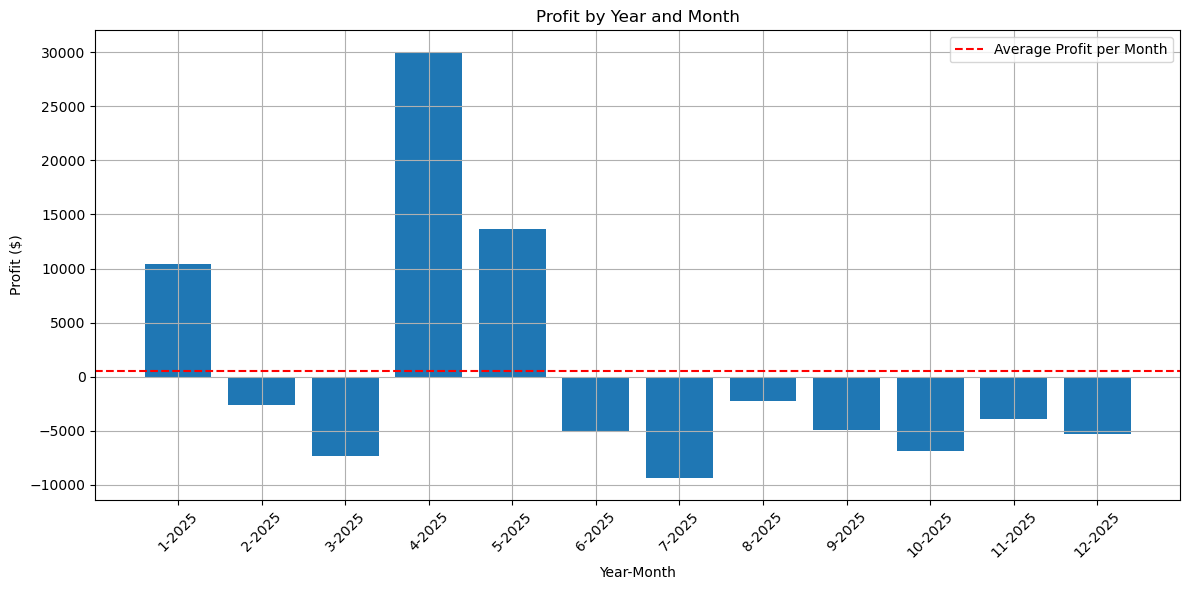

In [176]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Profitto_100'])
plt.axhline(y=average_profit_per_month_usd, color='r', linestyle='--', label='Average Profit per Month')
plt.title('Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [177]:
# group df_dates by Year and Month
df_dates_grouped_pct = df_dates.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped_pct.head(10)

,Year,Month,Profit_pct_100
0,2025,1,10.44830
1,2025,2,-2.60173
2,2025,3,-7.31306
3,2025,4,30.04462
4,2025,5,13.63088
5,2025,6,-5.12465
6,2025,7,-9.39355
7,2025,8,-2.19583
8,2025,9,-4.94679
9,2025,10,-6.90020


In [178]:
# average Profit_pct_100
average_profit_pct_per_month_pct = df_dates_grouped_pct['Profit_pct_100'].mean().round(2)
average_profit_pct_per_month_pct

np.float64(0.54)

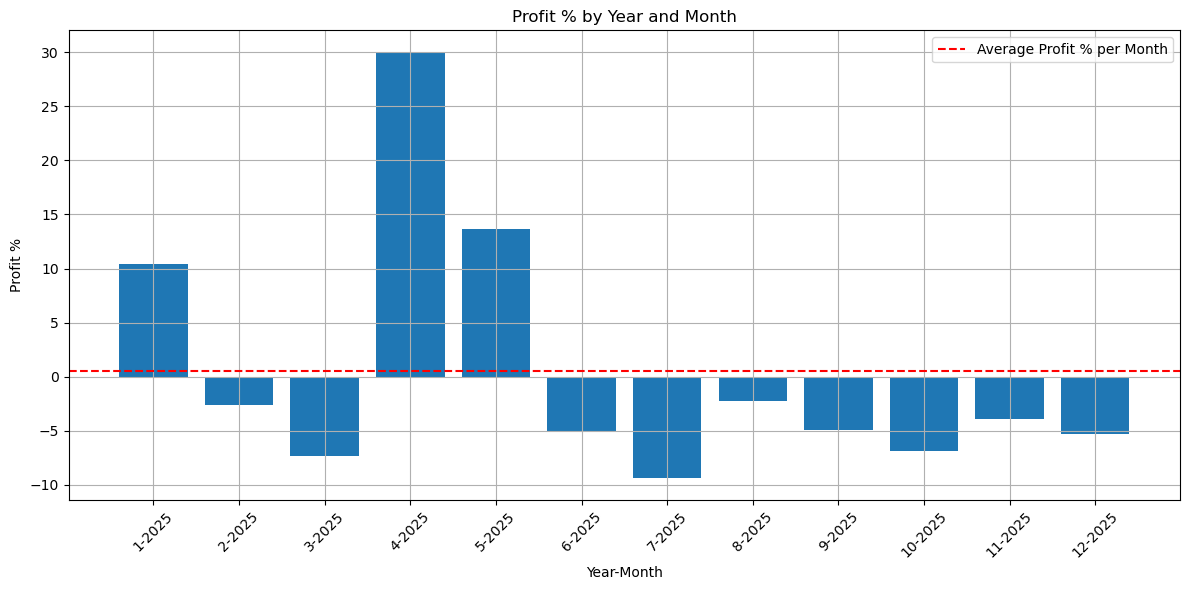

In [179]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), df_dates_grouped_pct['Profit_pct_100'])
plt.axhline(y=average_profit_pct_per_month_pct, color='r', linestyle='--', label='Average Profit % per Month')
plt.title('Profit % by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit %')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [180]:
# average profit per month
avg_profit_100 = df_dates_grouped.groupby('Month')['Profitto_100'].mean().reset_index()

# rename columns
avg_profit_100.columns = ['Month', 'Avg_Profitto_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100.head(12)

,Month,Avg_Profitto_100
0,1,10448.30
1,2,-2601.73
2,3,-7313.06
3,4,30044.62
4,5,13630.88
5,6,-5124.65
6,7,-9393.55
7,8,-2195.83
8,9,-4946.79
9,10,-6900.20


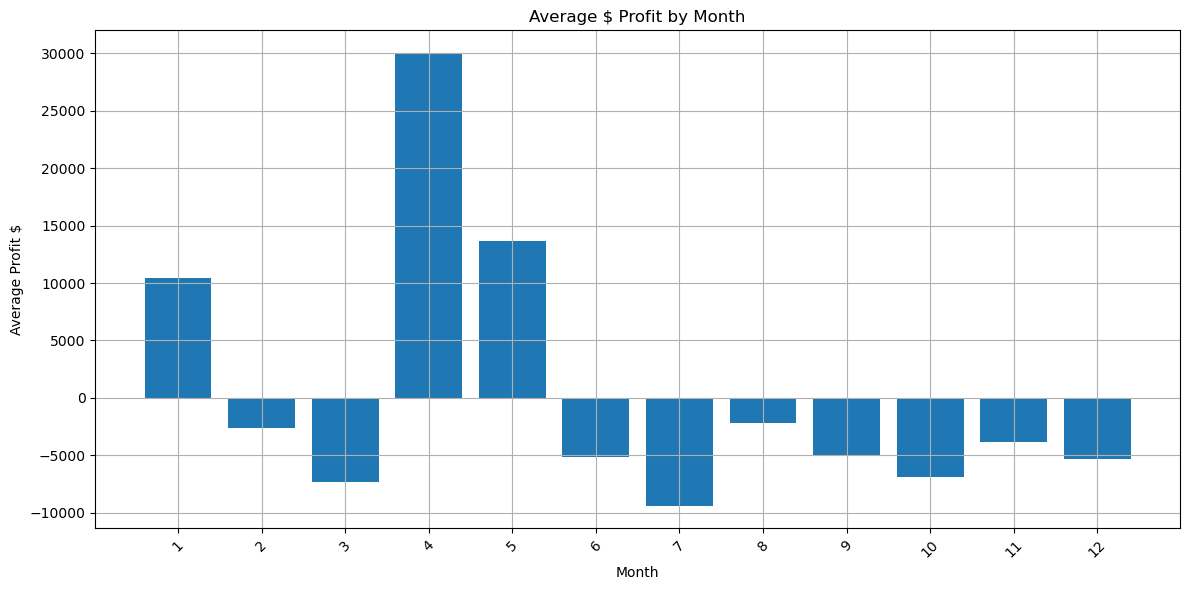

In [181]:
# bar plot avg_profit_100 
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100['Month'].astype(str), avg_profit_100['Avg_Profitto_100'])
plt.title('Average $ Profit by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit $')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

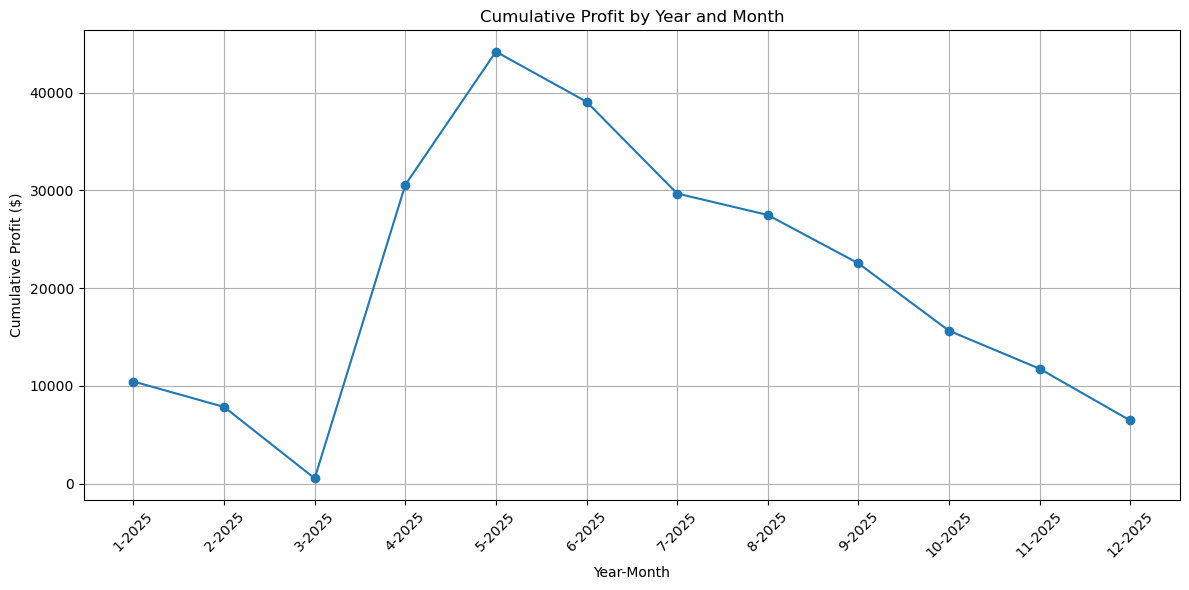

In [182]:
# calculate cumulative profit by year and month
df_dates_grouped['Cumulative_Profit'] = df_dates_grouped['Profitto_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Cumulative_Profit'], marker='o')
plt.title('Cumulative Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

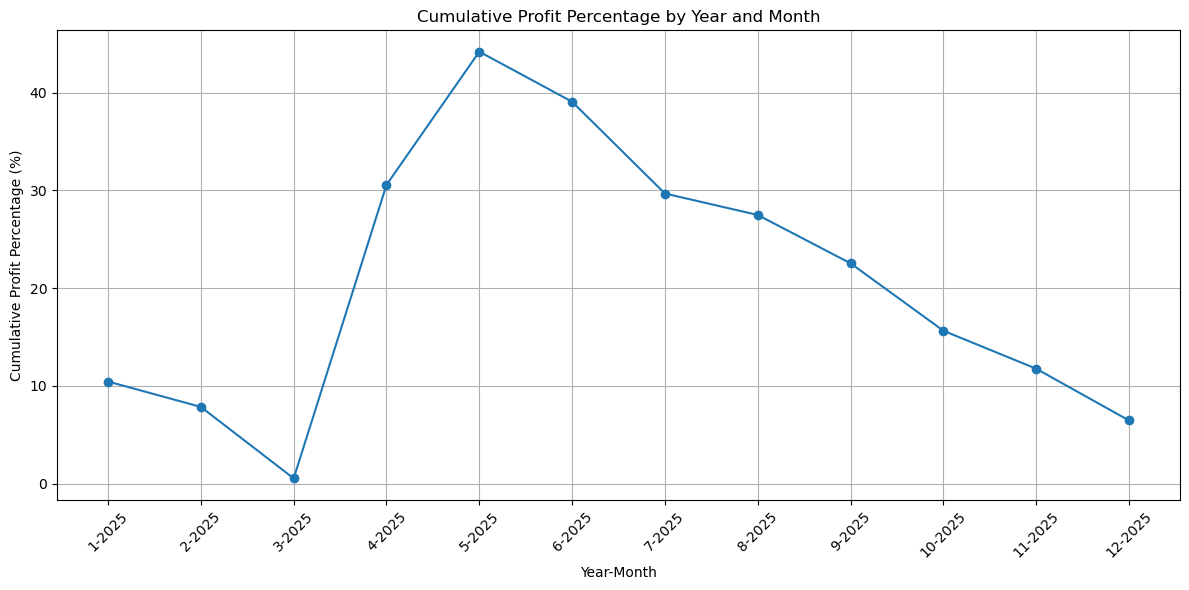

In [183]:
df_dates_grouped_pct = df_dates.copy()

# group df_dates_grouped_pct by Year and Month
df_dates_grouped_pct = df_dates_grouped_pct.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year and month
cum_profit_pct = df_dates_grouped_pct['Profit_pct_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), cum_profit_pct, marker='o')
plt.title('Cumulative Profit Percentage by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [184]:
# calculate the average profit percentage for each symbol
avg_profit_pct = df.groupby('Simbolo')['Profit_pct'].mean().sort_values(ascending=False).round(2)   

# Convert the result to a DataFrame
avg_profit_pct = avg_profit_pct.reset_index()

# Rename the columns
avg_profit_pct.columns = ['Simbolo', 'Average_Profit_Percentage']

# Display the result
avg_profit_pct.sort_values(by='Average_Profit_Percentage', ascending=False).head(10)

,Simbolo,Average_Profit_Percentage
0,LVMH,0.19
1,SPN35,0.15
2,AAPL,0.04
3,XAUUSD,0.03
4,NVDA,0.02
5,SOLUSD,0.02
6,GER40,0.02
7,GBPNZD,0.02
8,US100,0.01
9,AMZN,0.01


In [185]:
# check again

# average profit pct per month
avg_profit_100_pct = df_100.groupby('Month')['Profit_pct_100'].mean().reset_index()

# rename columns
avg_profit_100_pct.columns = ['Month', 'Avg_Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100_pct.head(12)

,Month,Avg_Profit_pct_100
0,1,0.007495
1,2,-0.004210
2,3,-0.009210
3,4,0.035430
4,5,0.015831
5,6,-0.007406
6,7,-0.014233
7,8,-0.005435
8,9,-0.016219
9,10,-0.019383


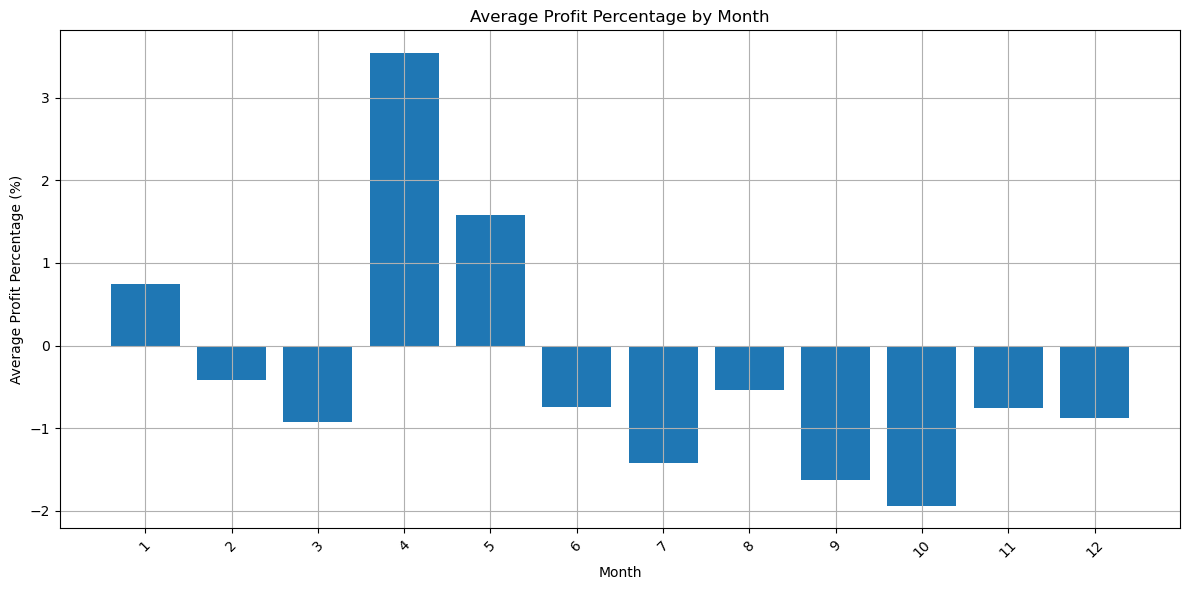

In [186]:
# bar plot avg_profit_100_pct
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100_pct['Month'].astype(str), avg_profit_100_pct['Avg_Profit_pct_100']*100)
plt.title('Average Profit Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [187]:
df_100.head()

,Ticket,Apri,Tipologia,Volume,Simbolo,Prezzo,SL,TP,Chiudi,Prezzo.1,...,Account_Amount,Profit_pct,Month,Year,Asset,Prop,Day,Profitto_100,Tot_Commissioni_100,Profit_pct_100
972,315436403,2025-01-01 19:00:00,BUY,0.01,BTCUSD,94081.35,92635.94,96212.75,2025-01-01 20:00:00,94112.36,...,20000,0.00,1,2025,Crypto,5%,1,1.55,0.00,0.00155
973,315438534,2025-01-01 20:00:00,BUY,0.01,BTCUSD,94134.95,92697.79,96288.59,2025-01-01 22:00:00,94600.76,...,20000,0.02,1,2025,Crypto,5%,1,23.30,0.00,0.02330
974,315444826,2025-01-01 23:00:00,BUY,0.01,BTCUSD,94776.45,93341.39,96932.19,2025-01-02 12:00:00,96720.86,...,20000,0.10,1,2025,Crypto,5%,1,91.70,-5.50,0.09170
975,315520931,2025-01-02 08:00:00,SELL,0.01,US30,42688.71,43642.44,41693.69,2025-01-03 04:00:06,42387.79,...,20000,0.02,1,2025,Indexes,5%,2,14.90,-0.15,0.01490
976,315616770,2025-01-02 12:00:00,SELL,0.01,US30,42734.61,42958.74,42439.01,2025-01-02 18:04:10,42434.79,...,20000,0.02,1,2025,Indexes,5%,2,15.00,0.00,0.01500


In [188]:
founded = df_100.copy()

In [189]:
df_3_months = df_100.copy()

from datetime import datetime, timedelta

# Get the current date
today = datetime.now()

# Calculate the date 3 months ago
three_months_ago = today - timedelta(days=90)

# filter the dataframe for the last 3 months
df_3_months_filtered = df_3_months.loc[
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') >= three_months_ago) &
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') <= today)
]

In [190]:
# double check charts of last 3 months period..

In [191]:
# from df_3_months_filtered calculate best and worst symbols
best_simbol_3_months = df_3_months_filtered.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_3_months = best_simbol_3_months.reset_index()

# Rename the columns
best_simbol_3_months.columns = ['Symbol', '3_Months_Gain']

# Display the result
best_simbol_3_months.sort_values(by='3_Months_Gain', ascending=False).head(10)
best_simbol_3_months

,Symbol,3_Months_Gain
0,AAPL,868.82
1,SPN35,743.66
2,ETHUSD,416.40
3,GER40,227.81
4,LVMH,187.68
5,JP225,166.92
6,META,114.20
7,BTCUSD,74.26
8,USDCAD,24.43
9,JPN225,-3.75


In [192]:
# worst symbols
worst_simbol_3_months = best_simbol_3_months.sort_values(by='3_Months_Gain', ascending=True).head(10)

# rename columns
worst_simbol_3_months.columns = ['Symbol', '3_Months_Loss']

worst_simbol_3_months

,Symbol,3_Months_Loss
29,US100,-4546.96
28,US500,-2262.39
27,XAUUSD,-1134.98
26,TSLA,-864.90
25,BABA,-547.86
24,RACE,-541.61
23,BNBUSD,-457.74
22,NVDA,-370.66
21,MSFT,-294.06
20,US30,-261.90


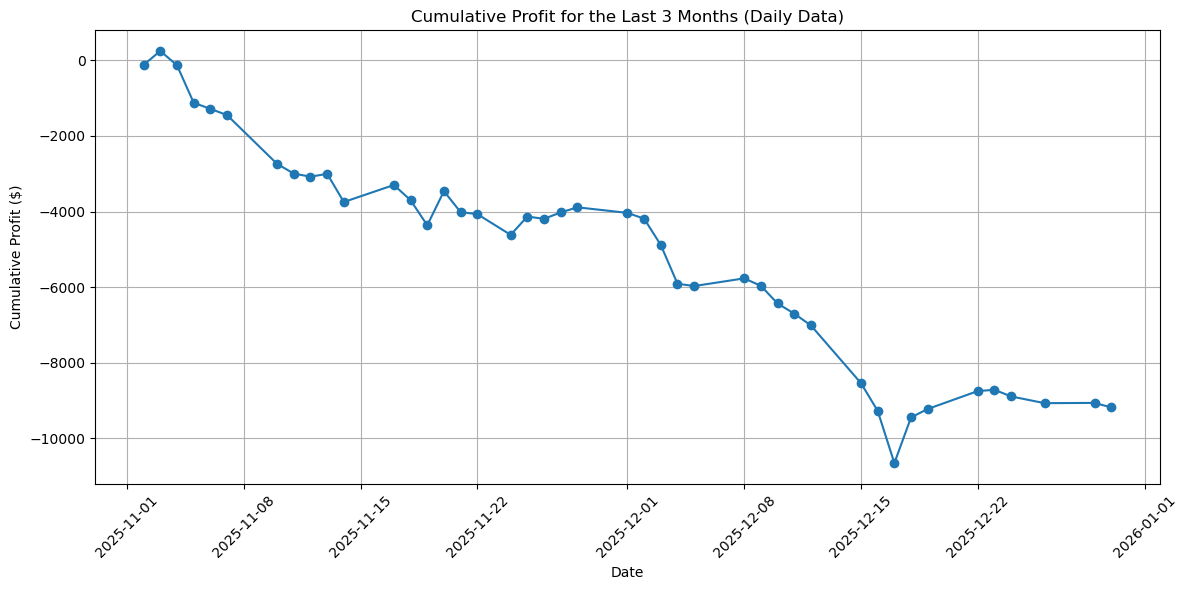

In [193]:
# Raggruppa per Year, Month e Day e calcola la somma dei profitti
df_3_months_filtered_cumsum = df_3_months_filtered.groupby(['Year', 'Month', 'Day']).agg({'Profitto_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
df_3_months_filtered_cumsum = df_3_months_filtered_cumsum.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum['Date'] = pd.to_datetime(df_3_months_filtered_cumsum[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum['Date'], df_3_months_filtered_cumsum['Profitto_100'].cumsum(), marker='o')
plt.title('Cumulative Profit for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

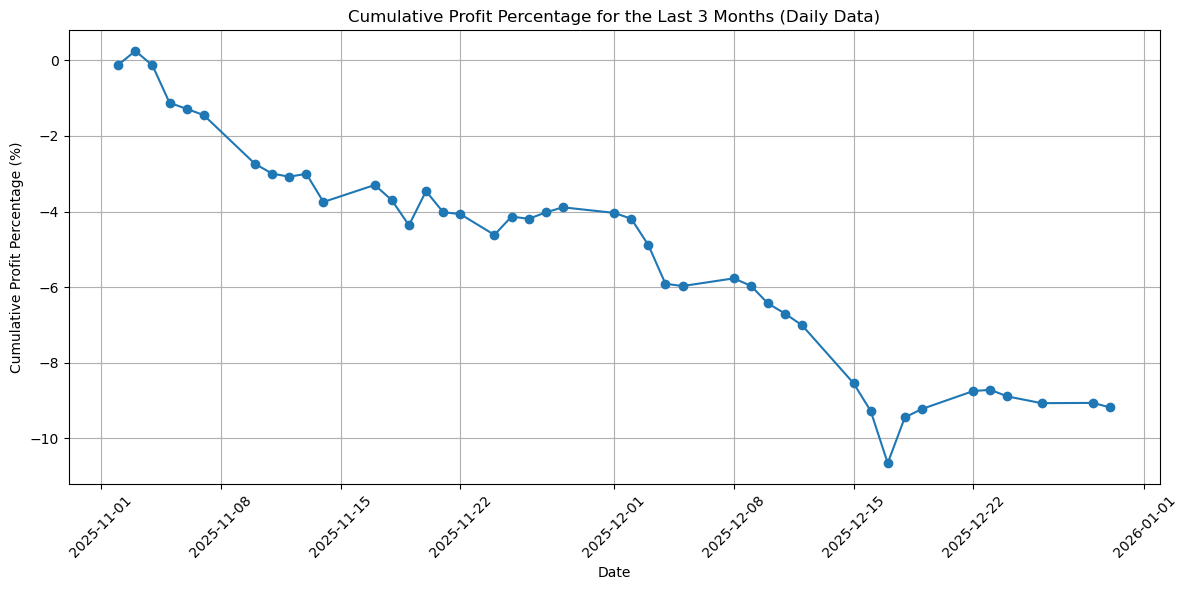

In [194]:
# Raggruppa per Month, Year e Day e calcola la somma dei profitti percentuali
df_3_months_filtered_cumsum_pct = df_3_months_filtered.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (utile per il plot)
df_3_months_filtered_cumsum_pct = df_3_months_filtered_cumsum_pct.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum_pct['Date'] = pd.to_datetime(df_3_months_filtered_cumsum_pct[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum_pct['Date'], df_3_months_filtered_cumsum_pct['Profit_pct_100'].cumsum(), marker='o')
plt.title('Cumulative Profit Percentage for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [195]:
# win rate calculation for df_100

# Calculate the number of winning trades
winning_trades = df_100[df_100['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades
total_trades = df_100.shape[0]

# Calculate the win rate
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

# Display the win rate
print(f"Win Rate from April 2023: {win_rate:.2f}%")

Win Rate from April 2023: 49.97%


In [196]:
# win rate calculation for df_3_months_filtered

# Calculate the number of winning trades for the last 3 months
winning_trades_3_months = df_3_months_filtered[df_3_months_filtered['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades for the last 3 months
total_trades_3_months = df_3_months_filtered.shape[0]

# Calculate the win rate for the last 3 months
win_rate_3_months = (winning_trades_3_months / total_trades_3_months) * 100 if total_trades_3_months > 0 else 0

# Display the win rate for the last 3 months
print(f"Win Rate for the Last 3 Months: {win_rate_3_months:.2f}%")

Win Rate for the Last 3 Months: 33.93%


In [197]:
# count total number of trades for the whole dataset
total_trades_all = df_100.shape[0]

# Display the total number of trades
print(f"Total Number of Trades: {total_trades_all}")

Total Number of Trades: 8049


In [198]:
# Number of trades per day
trades_per_day = df_100.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Trades_Count')

# Display the first few rows of trades_per_day
trades_per_day.head(10)

,Year,Month,Day,Trades_Count
0,2025,1,1,6
1,2025,1,2,52
2,2025,1,3,47
3,2025,1,5,2
4,2025,1,6,77
5,2025,1,7,73
6,2025,1,8,56
7,2025,1,9,51
8,2025,1,10,72
9,2025,1,11,6


In [199]:
# average number of trades per day
avg_trades_per_day = trades_per_day['Trades_Count'].mean()

# Display the average number of trades per day
print(f"Average Number of Trades per Day from April 2023: {avg_trades_per_day:.2f}")

Average Number of Trades per Day from April 2023: 28.44


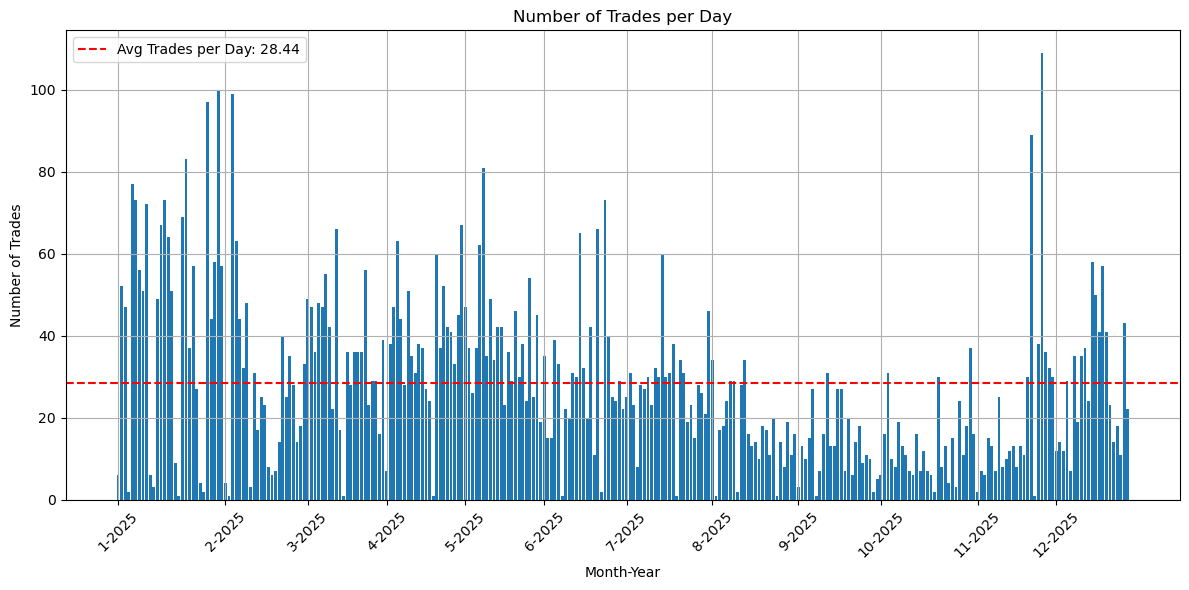

In [200]:
# trades_per_day plot with bar chart, with avg_trades_per_day horizontal line
plt.figure(figsize=(12, 6))
plt.bar(trades_per_day.index, trades_per_day['Trades_Count'])

# Days grouped by Month and Year for x-axis labels
month_year = trades_per_day['Month'].astype(str) + '-' + trades_per_day['Year'].astype(str)
_, tick_positions = np.unique(month_year, return_index=True)
tick_labels = month_year.iloc[tick_positions].values

plt.axhline(y=avg_trades_per_day, color='r', linestyle='--', label=f'Avg Trades per Day: {avg_trades_per_day:.2f}')
plt.title('Number of Trades per Day')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trades')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [201]:
# Create filtered data_tv_tv_tvframes for each symbol/asset
df_nq_100 = df_100[df_100['Simbolo'] == 'US100'].copy()
df_spx_100 = df_100[df_100['Simbolo'] == 'US500'].copy()
df_us30_100 = df_100[df_100['Simbolo'] == 'US30'].copy()
df_stocks_100 = df_100[df_100['Asset'] == 'Stocks'].copy()

# add dfs
df_crypto_100 = df_100[df_100['Asset'] == 'Crypto'].copy()
df_forex_100 = df_100[df_100['Asset'] == 'Forex'].copy()
df_commodities_100 = df_100[df_100['Asset'] == 'Commodities'].copy()

In [202]:
# df_nq group by Year, Month and day columns
df_nq_grouped = df_nq_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_nq_grouped['Cumulative_Profit'] = np.log(1 + df_nq_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

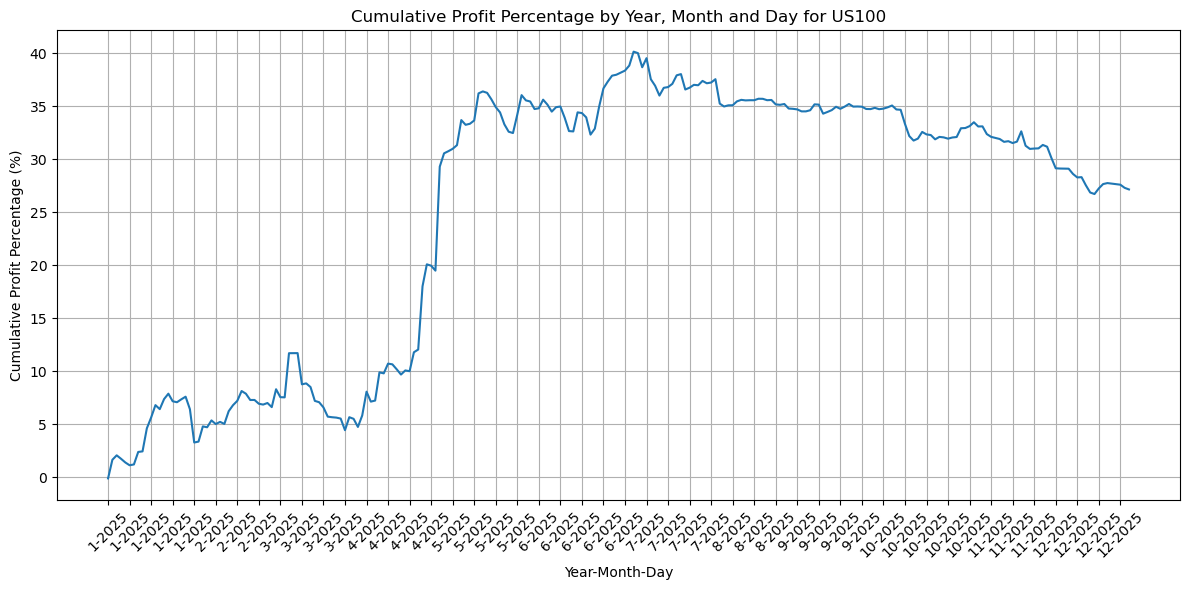

In [203]:
# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped['Day'].astype(str) + '-' + df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str), df_nq_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit Percentage by Year, Month and Day for US100')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(
	ticks=range(0, len(df_nq_grouped), 5),
	labels=(df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


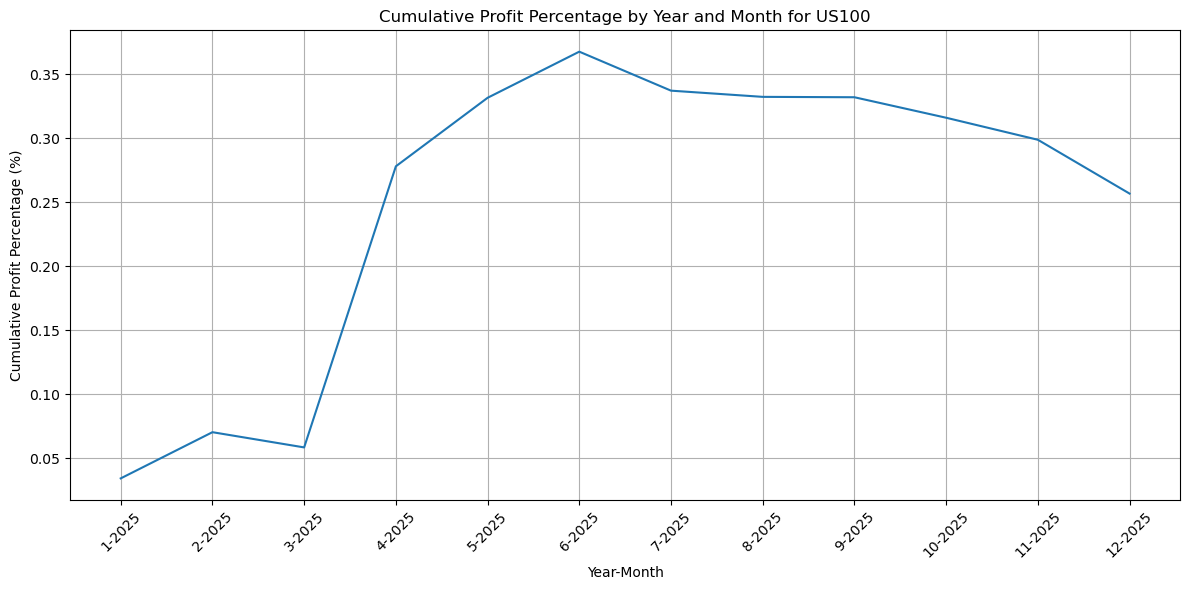

In [204]:
# df_nq group by Year, Month
df_nq_grouped_month_year = df_nq_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month using log returns
df_nq_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_nq_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped_month_year['Month'].astype(str) + '-' + df_nq_grouped_month_year['Year'].astype(str), df_nq_grouped_month_year['Cumulative_Profit'])
plt.title('Cumulative Profit Percentage by Year and Month for US100')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


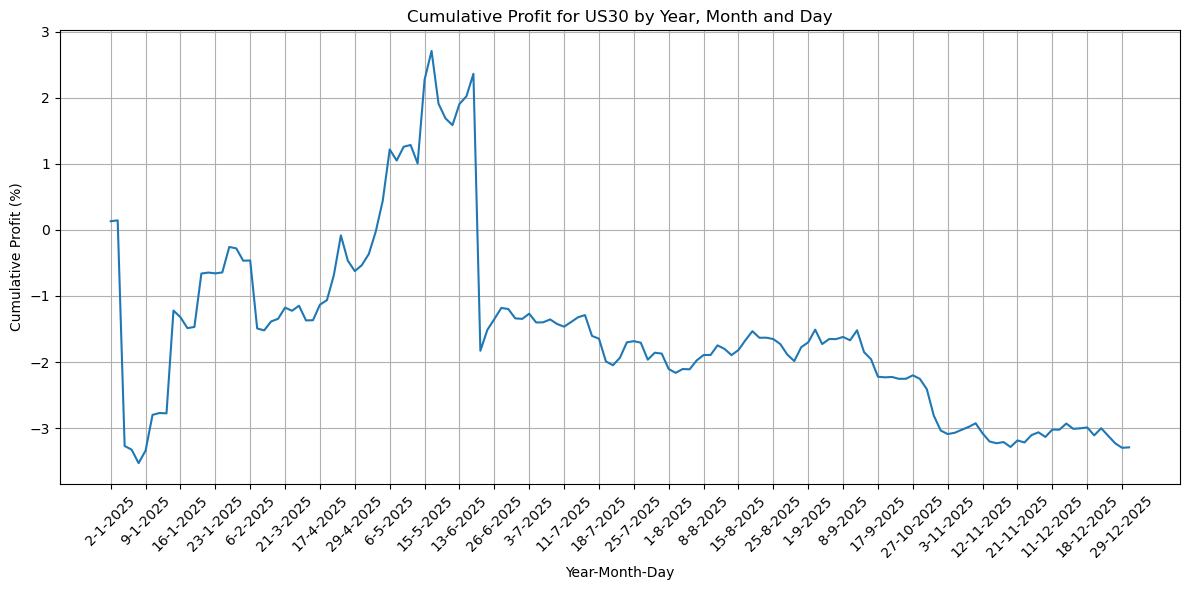

In [205]:
# df_us30 group by Year, Month and day columns
df_us30_grouped = df_us30_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped['Cumulative_Profit'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str), df_us30_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(
	ticks=range(0, len(df_us30_grouped), 5),
	labels=(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

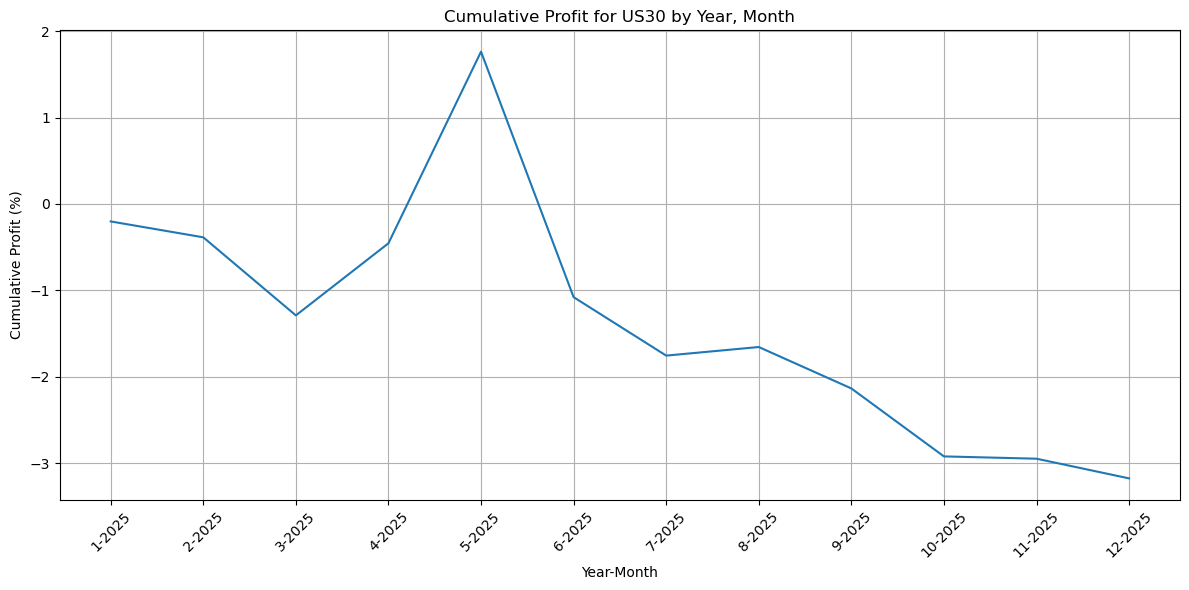

In [206]:
# df_us30 group by Year, Month
df_us30_grouped_month_year = df_us30_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_us30_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped_month_year['Month'].astype(str) + '-' + df_us30_grouped_month_year['Year'].astype(str), df_us30_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

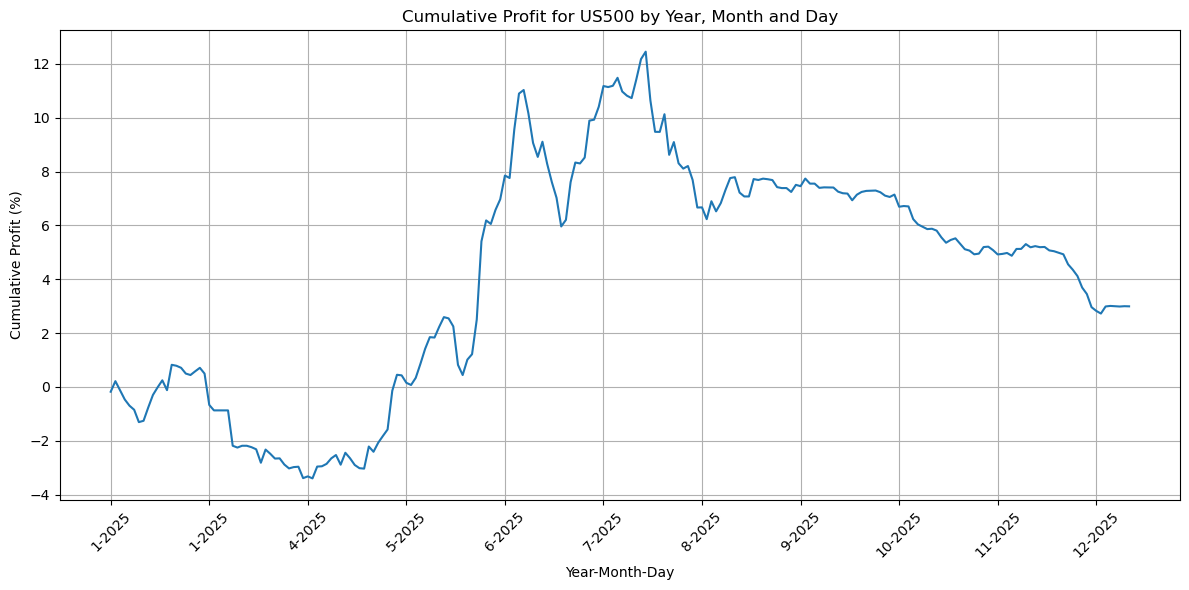

In [207]:
# df_spx group by Year, Month and day columns
df_spx_grouped = df_spx_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped['Cumulative_Profit'] = np.log(1 + df_spx_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped['Day'].astype(str) + '-' + df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str), df_spx_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_spx_grouped), max(1, len(df_spx_grouped)//10)), 
           labels=(df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str))[::max(1, len(df_spx_grouped)//10)],
           rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

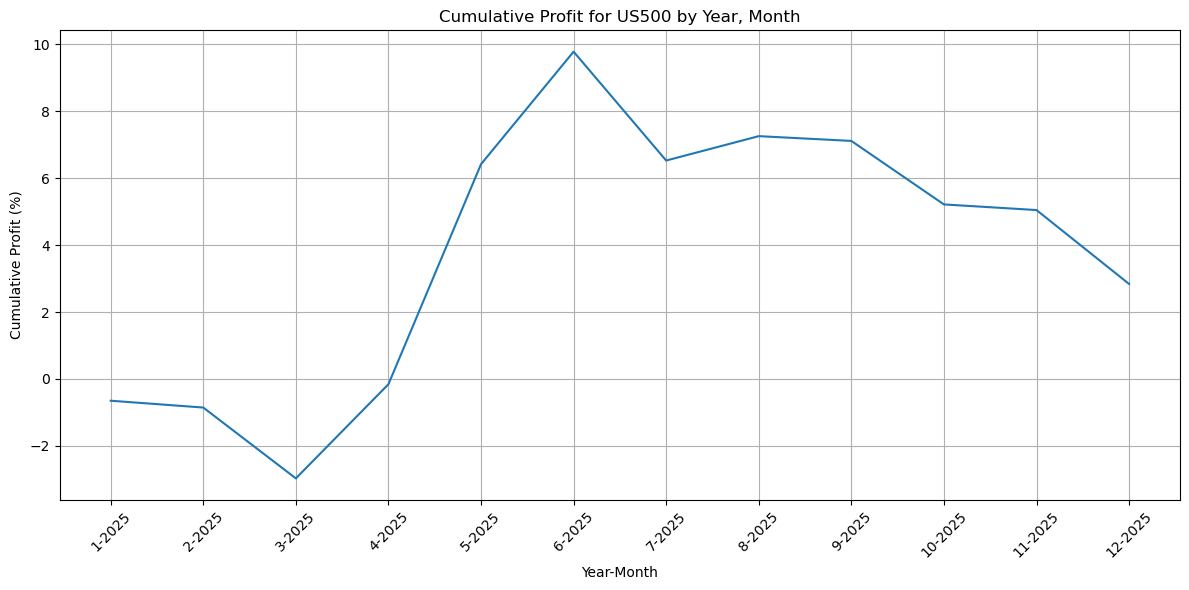

In [208]:
# df_spx group by Year, Month
df_spx_grouped_month_year = df_spx_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_spx_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped_month_year['Month'].astype(str) + '-' + df_spx_grouped_month_year['Year'].astype(str), df_spx_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

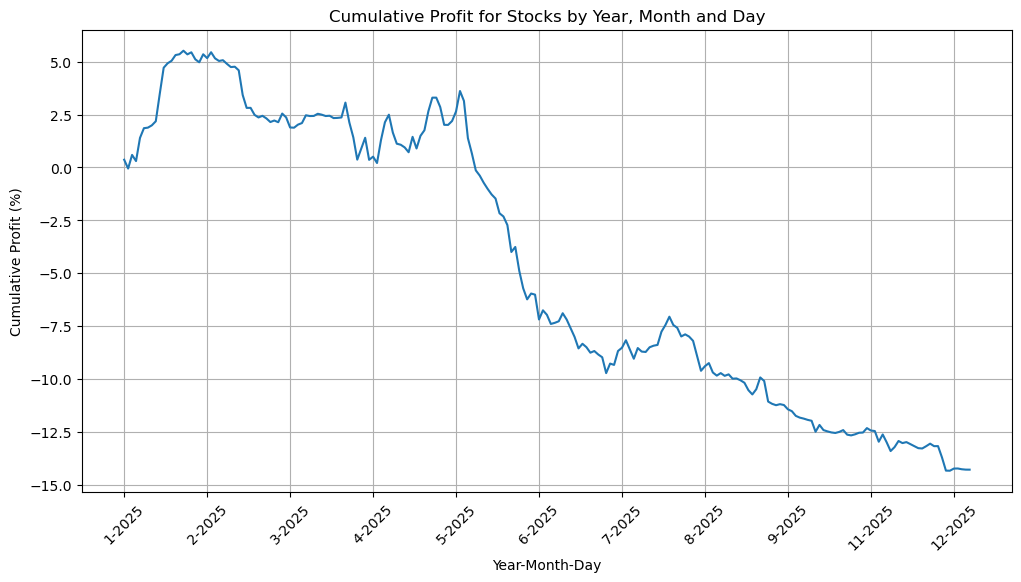

In [209]:
# df_stocks_100 group by Year, Month and day columns
df_stocks_grouped = df_stocks_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped['Cumulative_Profit'] = np.log(1 + df_stocks_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str), df_stocks_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
# plt.xticks(rotation=45)
# plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
#            labels=(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
#            rotation=45)
plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
           labels=(df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.show()

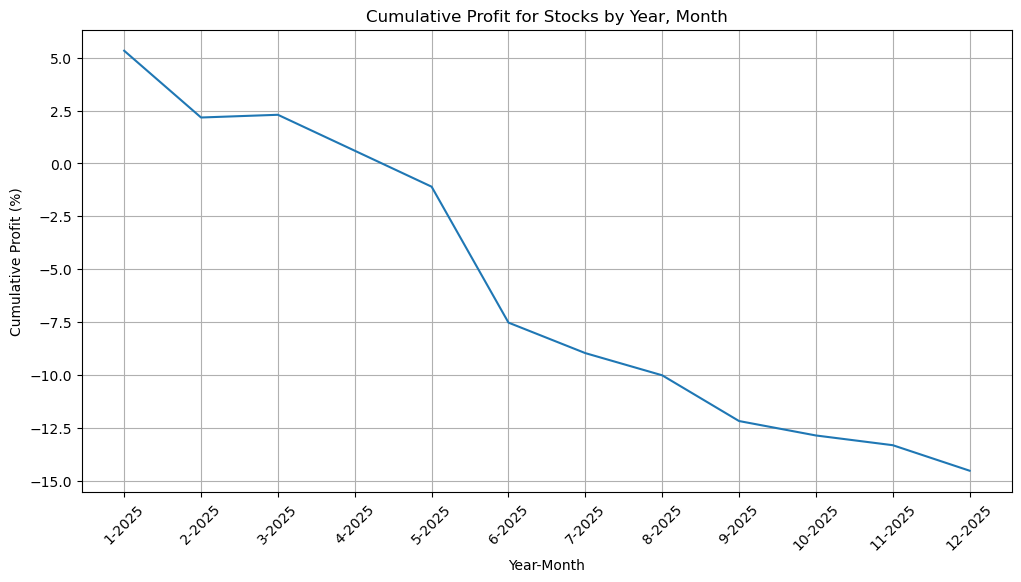

In [210]:
# df_stocks_100 group by Year, Month
df_stocks_grouped_month_year = df_stocks_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_stocks_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped_month_year['Month'].astype(str) + '-' + df_stocks_grouped_month_year['Year'].astype(str), df_stocks_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

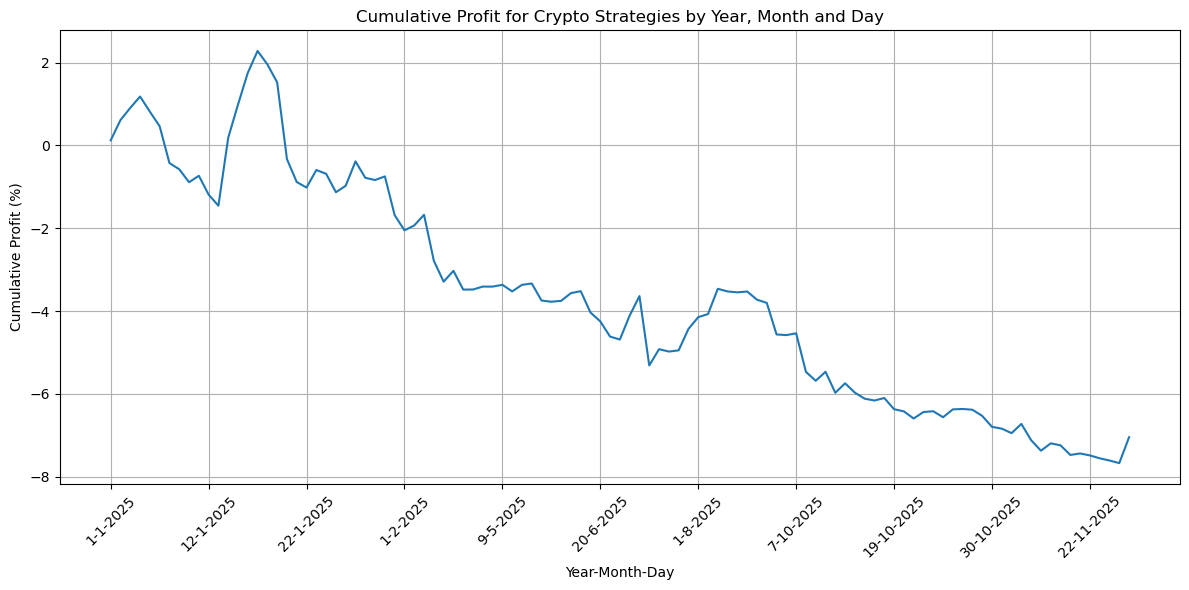

In [211]:
# group df_crypto_100 by Year, Month and Day
df_crypto_grouped = df_crypto_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_crypto_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_crypto_grouped['Cumulative_Profit'] = np.log(1 + df_crypto_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_crypto_grouped['Day'].astype(str) + '-' + df_crypto_grouped['Month'].astype(str) + '-' + df_crypto_grouped['Year'].astype(str), df_crypto_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Crypto Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_crypto_grouped), max(1, len(df_crypto_grouped) // 10)), 
           labels=(df_crypto_grouped['Day'].astype(str) + '-' + df_crypto_grouped['Month'].astype(str) + '-' + df_crypto_grouped['Year'].astype(str))[::max(1, len(df_crypto_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [212]:
# Add here Performance of Crypto Strategies against BTC as benchmark

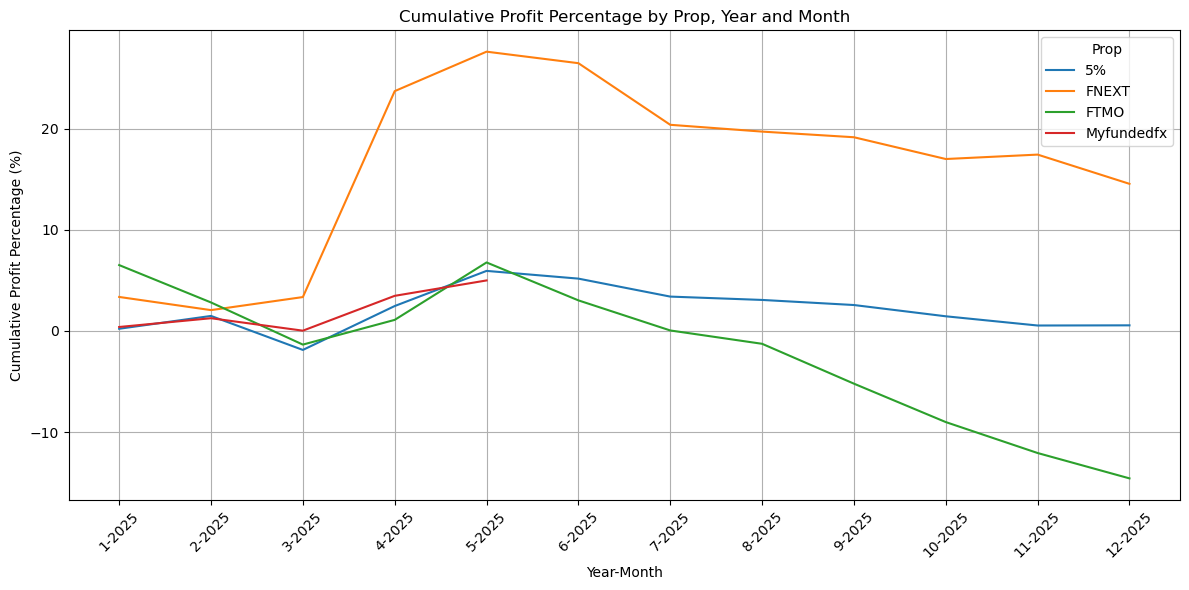

In [213]:
# group by Prop and Month, then plot Cumulative Profit_pct_100
df_prop = df_100.groupby(['Prop', 'Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_prop.columns = ['Prop', 'Year', 'Month', 'Profit_pct_100']

# sort by Year and Month to ensure chronological order
df_prop = df_prop.sort_values(['Year', 'Month'])

# calculate cumulative Profit_pct_100 by Prop, Year and Month using log returns
df_prop['Cumulative_Profit'] = df_prop.groupby('Prop').apply(
    lambda x: np.log(1 + x['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
).reset_index(level=0, drop=True)

# plot the data with a line chart
plt.figure(figsize=(12, 6))
for prop in df_prop['Prop'].unique():
    prop_data = df_prop[df_prop['Prop'] == prop]
    plt.plot(prop_data['Month'].astype(str) + '-' + prop_data['Year'].astype(str), prop_data['Cumulative_Profit']*100, label=prop)
plt.title('Cumulative Profit Percentage by Prop, Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Prop')
plt.grid()
plt.tight_layout()
plt.show()

In [214]:
# Add here profit on founded accounts by prop

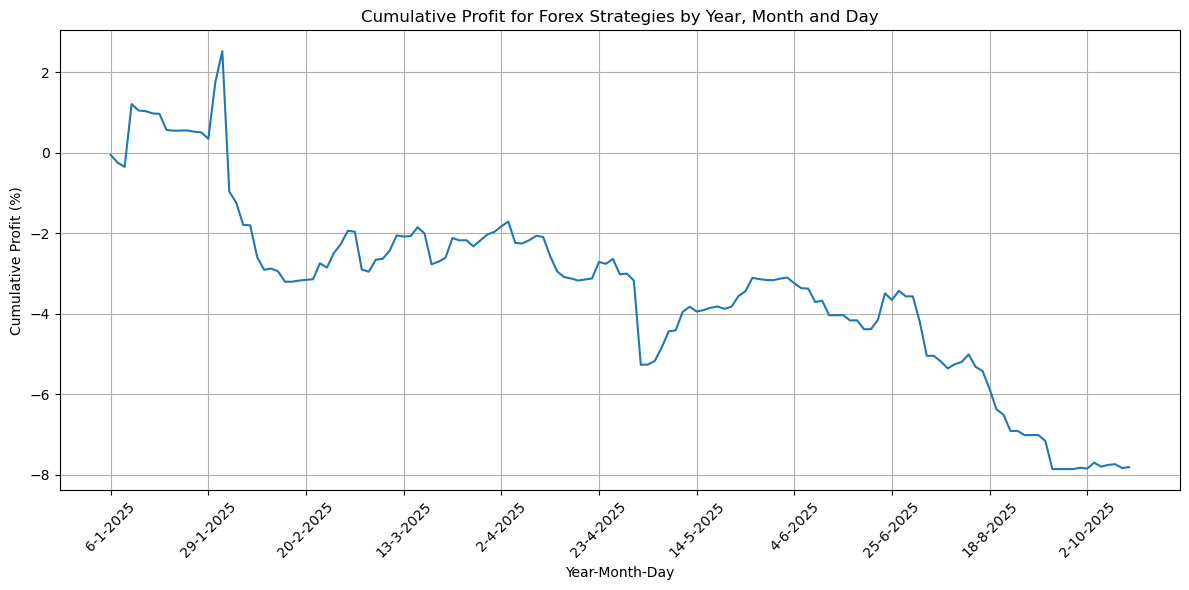

In [215]:
# group df_forex_100 by Year, Month and Day
df_forex_grouped = df_forex_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_forex_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_forex_grouped['Cumulative_Profit'] = np.log(1 + df_forex_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_forex_grouped['Day'].astype(str) + '-' + df_forex_grouped['Month'].astype(str) + '-' + df_forex_grouped['Year'].astype(str), df_forex_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Forex Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_forex_grouped), max(1, len(df_forex_grouped) // 10)), 
           labels=(df_forex_grouped['Day'].astype(str) + '-' + df_forex_grouped['Month'].astype(str) + '-' + df_forex_grouped['Year'].astype(str))[::max(1, len(df_forex_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

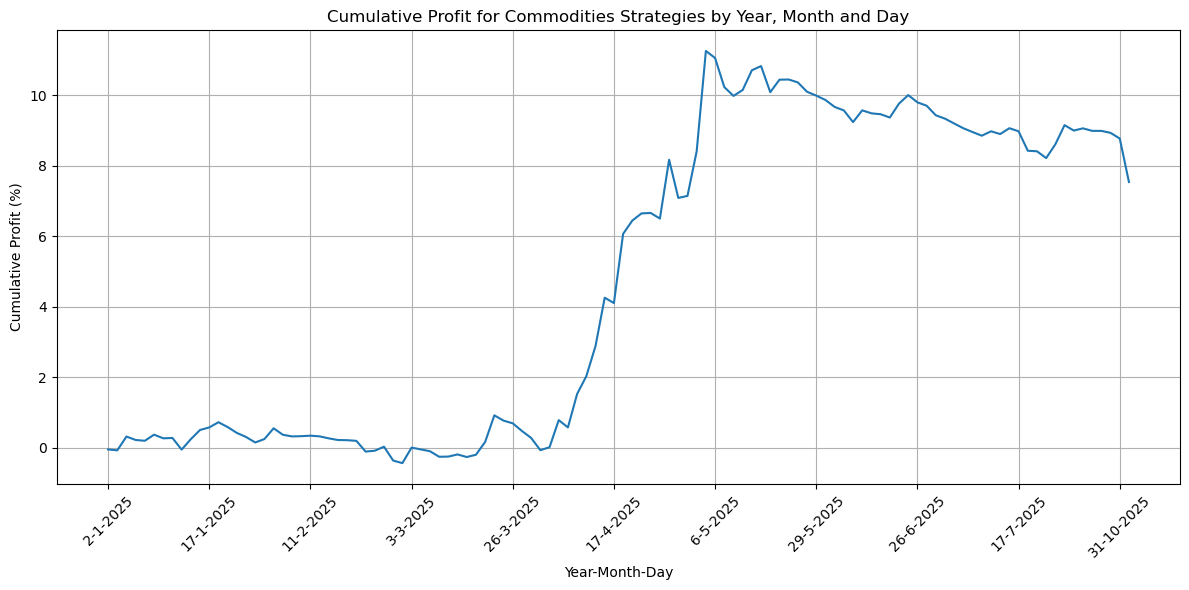

In [216]:
# group df_commodities_100 by Year, Month and Day
df_commodities_grouped = df_commodities_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_commodities_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_commodities_grouped['Cumulative_Profit'] = np.log(1 + df_commodities_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_commodities_grouped['Day'].astype(str) + '-' + df_commodities_grouped['Month'].astype(str) + '-' + df_commodities_grouped['Year'].astype(str), df_commodities_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Commodities Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_commodities_grouped), max(1, len(df_commodities_grouped) // 10)), 
           labels=(df_commodities_grouped['Day'].astype(str) + '-' + df_commodities_grouped['Month'].astype(str) + '-' + df_commodities_grouped['Year'].astype(str))[::max(1, len(df_commodities_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [217]:
# change name of df_100_no_5ers..

In [218]:
# Soluzione corretta per le colonne datetime
df_100_no_5ers = df_100.copy()

# Rimuovi dayfirst=True perché i dati sono già in formato ISO
df_100_no_5ers['Apri'] = pd.to_datetime(df_100_no_5ers['Apri'], errors='coerce')
df_100_no_5ers['Chiudi'] = pd.to_datetime(df_100_no_5ers['Chiudi'], errors='coerce')

# Crea i DataFrame per le strategie principali e ordina per 'Apri'
df_nq_sorted = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US100'].copy().sort_values(by='Apri')
df_us30_sorted = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US30'].copy().sort_values(by='Apri')
df_spx_sorted = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US500'].copy().sort_values(by='Apri')
df_stocks_sorted = df_100_no_5ers[df_100_no_5ers['Asset'] == 'Stocks'].copy().sort_values(by='Apri')

In [219]:
# Verifica i risultati
print("NaT in 'Apri' dopo correzione:", df_100_no_5ers['Apri'].isna().sum())
print("NaT in 'Chiudi' dopo correzione:", df_100_no_5ers['Chiudi'].isna().sum())

# Verifica che i ticket problematici siano ora convertiti correttamente
test_tickets = df_100_no_5ers[df_100_no_5ers['Ticket'].isin([262872616, 263264326, 263735393])]
print("\nValori dopo correzione:")
print(test_tickets[['Ticket', 'Apri', 'Chiudi']])

NaT in 'Apri' dopo correzione: 0
NaT in 'Chiudi' dopo correzione: 2

Valori dopo correzione:
Empty DataFrame
Columns: [Ticket, Apri, Chiudi]
Index: []


In [220]:
# create df_NaT from df_100_no_5ers where Apri or Chiudi is NaT
df_NaT = df_100_no_5ers[df_100_no_5ers['Apri'].isna() | df_100_no_5ers['Chiudi'].isna()].copy()
# df_NaT

In [221]:
# Check NaT in the sorted dataframes
print("Controllo finale:")
print(f"df_nq_sorted - NaT in Apri: {df_nq_sorted['Apri'].isna().sum()}")
print(f"df_us30_sorted - NaT in Apri: {df_us30_sorted['Apri'].isna().sum()}")
print(f"df_spx_sorted - NaT in Apri: {df_spx_sorted['Apri'].isna().sum()}")
print(f"df_stocks_sorted - NaT in Apri: {df_stocks_sorted['Apri'].isna().sum()}")

Controllo finale:
df_nq_sorted - NaT in Apri: 0
df_us30_sorted - NaT in Apri: 0
df_spx_sorted - NaT in Apri: 0
df_stocks_sorted - NaT in Apri: 0


In [222]:
# # calculate cumulative return for df_nq, df_us30, df_spx and df_stocks 
df_nq_sorted['Cumulative_Return'] = np.log(1 + df_nq_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_us30_sorted['Cumulative_Return'] = np.log(1 + df_us30_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_spx_sorted['Cumulative_Return'] = np.log(1 + df_spx_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_stocks_sorted['Cumulative_Return'] = np.log(1 + df_stocks_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

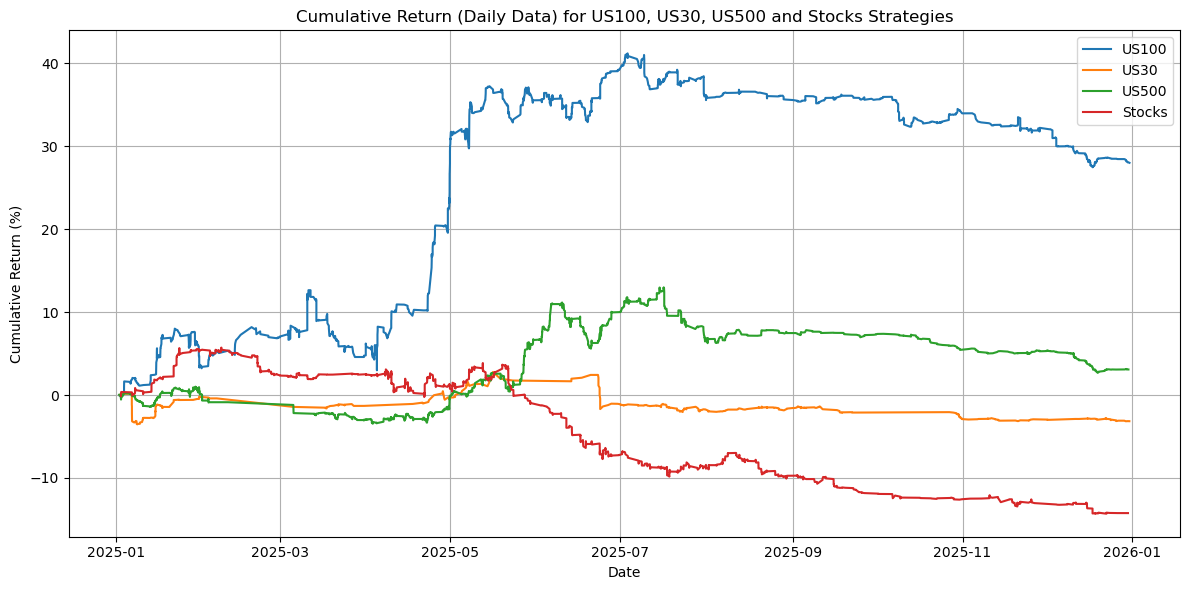

In [223]:
# DOUBLE CHECK THIS PART

# plot cumulative return for df_nq, df_us30, df_spx and df_stocks
plt.figure(figsize=(12, 6))
plt.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='US100')
plt.plot(df_us30_sorted['Apri'], df_us30_sorted['Cumulative_Return']*100, label='US30') 
plt.plot(df_spx_sorted['Apri'], df_spx_sorted['Cumulative_Return']*100, label='US500')
plt.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Stocks')
plt.title('Cumulative Return (Daily Data) for US100, US30, US500 and Stocks Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Analysis from OBB library

In [224]:
# # As a target benchmark, we will use SPY, QQQ, and DIA

# # download data for SPY, QQQ, and DIA from yFinance
# from openbb import obb

# symbols = ['SPY', 'QQQ', 'DIA']
# start_date = '2023-04-01'

# dataframes = []

# for symbol in symbols:
#     try:
#         data = obb.equity.price.historical(
#             symbol=symbol,
#             start_date=start_date,
#             provider="yfinance"
#         ).to_df()
#         data['Symbol'] = symbol
#         dataframes.append(data)
#     except Exception as e:
#         print(f"Failed to fetch data for {symbol}: {str(e)}")

# combined_data = pd.concat(dataframes)
# combined_data = combined_data.reset_index()

# # combined_data.head()

# combined_data_spy = df_sp500.copy()
# combined_data_dia = df_dia.copy()
# combined_data_qqq = df_qqq.copy()

# combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()
# combined_data_dia['daily_return'] = combined_data_dia['Close'].pct_change()
# combined_data_qqq['daily_return'] = combined_data_qqq['Close'].pct_change()

# # calculate the cumulative returns using log returns
# combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_dia['cumulative_return'] = np.log(1 + combined_data_dia['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_qqq['cumulative_return'] = np.log(1 + combined_data_qqq['daily_return']).cumsum().apply(np.exp) - 1

## Analysis from tv library, for SPY Only

In [225]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

# Connessione (se non metti user/password, usa versione guest con limiti)
tv = TvDatafeed()

# Lista ticker (usiamo il formato TradingView corretto!)
stock_exchanges = {
    'SPY': 'AMEX'   # su TradingView SPY è quotato come AMEX:SPY
}
# start is min of df_100_no_5ers.Apri
start_date = df_100_no_5ers.Apri.min()
today = datetime.now()
# days_difference = (today - start_date).days
n_bars = (today - start_date).days
# n_bars = min(days_difference + 100, 5000)  # max 5000

# Funzione con retry
def download_with_retry(symbol, exchange, retries=3, delay=2):
    for attempt in range(retries):
        try:
            print(f"Downloading {symbol} ({exchange}) attempt {attempt+1}")
            data_tv = tv.get_hist(
                symbol=symbol,
                exchange=exchange,
                interval=Interval.in_daily,
                n_bars=n_bars
            )
            if data_tv is not None and not data_tv.empty:
                print(f"{symbol}: {len(data_tv)} rows downloaded")
                return data_tv
        except Exception as e:
            print(f"Error {symbol}: {e}")
        if attempt < retries - 1:
            time.sleep(delay)
    print(f"Failed {symbol} after {retries} attempts")
    return None

# Download dati
data_dict = {}
failed = []
for stock, exchange in stock_exchanges.items():
    data_tv = download_with_retry(stock, exchange)
    if data_tv is not None:
        data_dict[stock] = data_tv['close']
    else:
        failed.append(stock)

# Combina
if data_dict:
    df_tv = pd.DataFrame(data_dict)
    df_tv.index = pd.to_datetime(df_tv.index)  # assicura datetime index
    print(f"Shape: {df_tv.shape}")
    print(f"Range: {df_tv.index.min()} → {df_tv.index.max()}")
    # print(df_tv.head())
else:
    print("Nessun dato scaricato")

df_sp500 = df_tv.copy()

# rename column to Close
df_sp500.rename(columns={'SPY': 'Close'}, inplace=True)

SPY: 364 rows downloaded
Shape: (364, 1)
Range: 2024-07-22 16:30:00 → 2025-12-31 17:30:00


## Analysis from csv file, for SPY Only

In [226]:
# # Get CSV path from environment variables
# path_df_sp500 = os.getenv('path_df_sp500')

# # Use the path from environment
# url = path_df_sp500

# # # read csv file from url   
# # df_sp500 = pd.read_csv(url, sep=',', index_col=0, parse_dates=True)

# # Use this if df_sp500 has been downloaded and saved as a CSV file from yf
# # read csv file from url   
# df_sp500 = pd.read_csv(url, sep=';', index_col=0, parse_dates=True)

# # Assicurati che l'indice sia datetime
# df_sp500.index = pd.to_datetime(df_sp500.index)
# df_sp500.tail()

## Analysis from csv file, for SPY Only (yf format)

In [227]:
# # to complete..................

# # Get CSV path from environment variables
# path_df_sp500 = os.getenv('path_df_sp500')

# # Load the CSV with semicolon separator and MultiIndex columns
# df_sp500 = pd.read_csv(path_df_sp500, sep=';', header=[0,1], index_col=0)

# # Drop any rows that are completely NaN (e.g. 'Date' row)
# df_sp500 = df_sp500.dropna(how='all')

# # Drop the "Ticker" row if it exists
# if 'Ticker' in df_sp500.index:
#     df_sp500 = df_sp500.drop('Ticker')

# # # Debug: check column structure
# # print("Columns:", df_sp500.columns.tolist())
# # print("Column levels:", df_sp500.columns.nlevels)

# # Convert index to datetime
# df_sp500.index = pd.to_datetime(df_sp500.index)

# # Convert all values to float
# df_sp500 = df_sp500.astype(float)

# # Find and keep only the "Close" column (search for Close in any level)
# close_cols = [col for col in df_sp500.columns if 'Close' in str(col)]
# # print("Close columns found:", close_cols)

# if close_cols:
#     df_sp500 = df_sp500[close_cols[0]]  # Take the first Close column found
# else:
#     # Fallback: take the first column if no Close found
#     df_sp500 = df_sp500.iloc[:, 0]

# # Show the result
# df_sp500.head()

In [228]:
df_100_no_5ers.shape

(8049, 26)

In [229]:
# Assicurati che Apri e Chiudi siano datetime
apri_min = pd.to_datetime(df_100_no_5ers['Apri']).min()
chiudi_max = pd.to_datetime(df_100_no_5ers['Chiudi']).max()

# keep only DatetimeIndex higher than df_100_no_5ers['Apri'].min() and lower than end_date = df_100_no_5ers['Chiudi'].max()
df_sp500 = df_sp500.loc[
    (df_sp500.index >= apri_min) &
    (df_sp500.index <= chiudi_max)
]

#df_sp500.head()

combined_data_spy = df_sp500.copy()

combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()

# drop na
combined_data_spy = combined_data_spy.dropna(subset=['daily_return'])

# calculate the cumulative returns using log returns
combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1

combined_data_spy.tail()


,Close,daily_return,cumulative_return
datetime,,,
2025-12-23 17:30:00,687.96,0.004570,0.176724
2025-12-24 17:30:00,690.38,0.003518,0.180863
2025-12-26 17:30:00,690.31,-0.000101,0.180744
2025-12-29 17:30:00,687.85,-0.003564,0.176536
2025-12-30 17:30:00,687.01,-0.001221,0.175099


In [230]:
chiudi_max

Timestamp('2025-12-31 16:00:01')

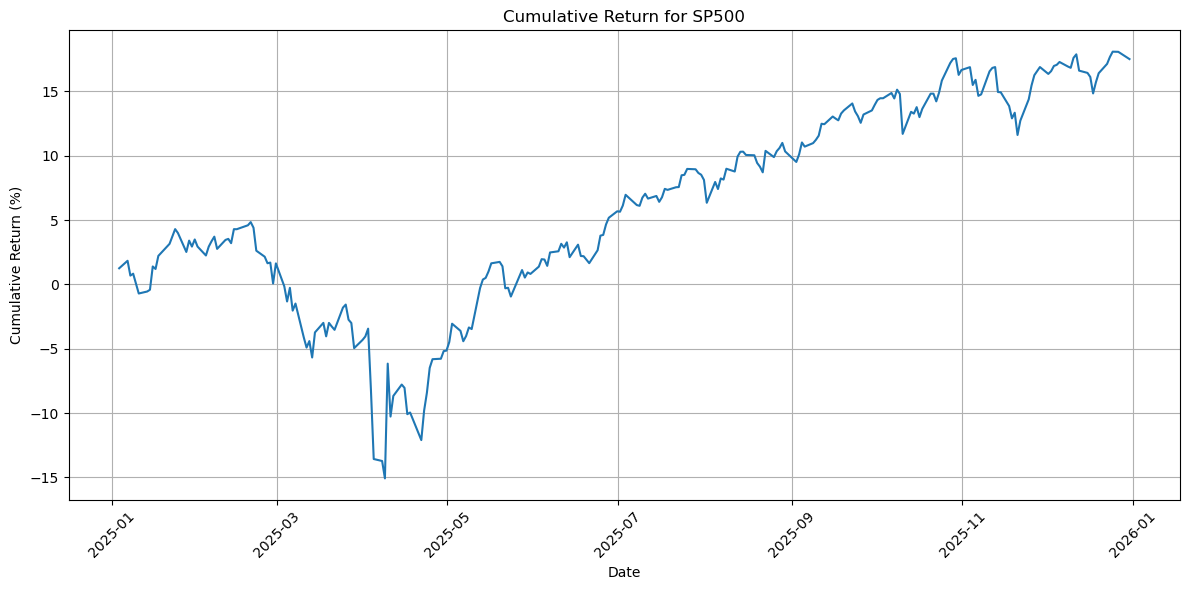

In [231]:
# plot combined_data_spy cumulative_return column
plt.figure(figsize=(12, 6))
plt.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SP500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return for SP500')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

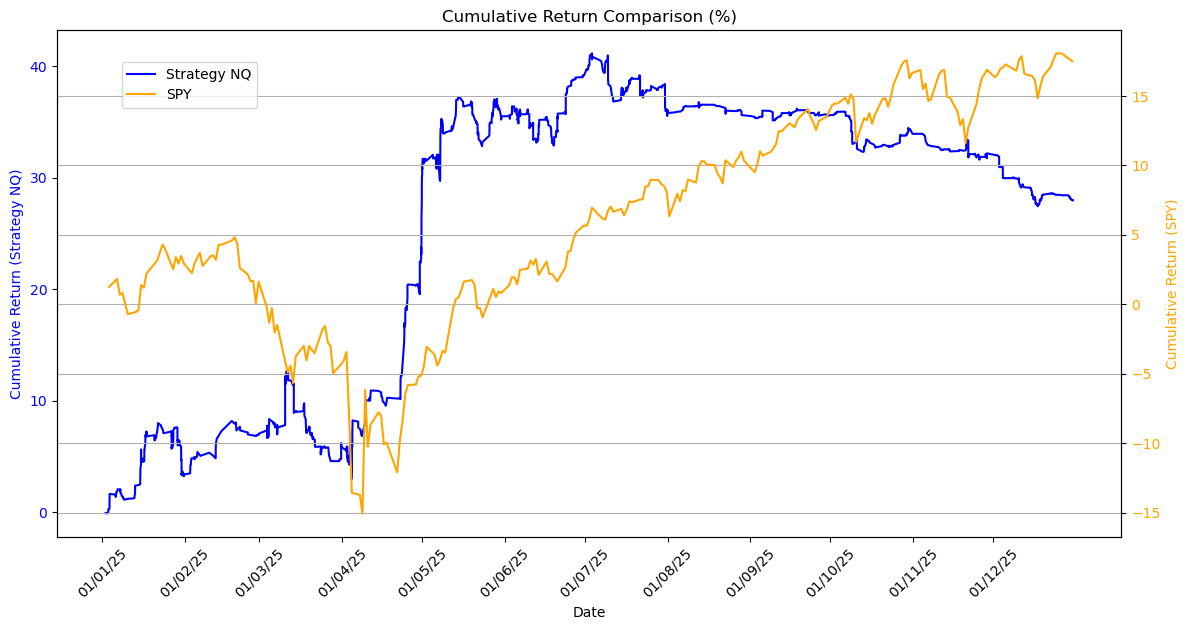

In [232]:
# Use two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset on the primary y-axis
ax1.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='Strategy NQ', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy NQ)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# # Migliora la leggibilità delle etichette dell'asse x
# # Imposta i tick dell'asse x ogni 30 giorni (o altro intervallo ragionevole)
# df_us30_grouped['Date'] = pd.to_datetime(df_us30_grouped[['Year', 'Month', 'Day']])
# dates = df_us30_grouped['Date']

# tick_freq = 30  # mostra una data ogni 30 giorni
# if len(dates) > 0:
#     tick_positions = range(0, len(dates), tick_freq)
#     tick_labels = dates.iloc[list(tick_positions)].dt.strftime('%Y-%m-%d')
#     ax1.set_xticks(dates.iloc[list(tick_positions)])
#     ax1.set_xticklabels(tick_labels, rotation=45)

# Tick dell'asse x: una data per ogni mese di SPY
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

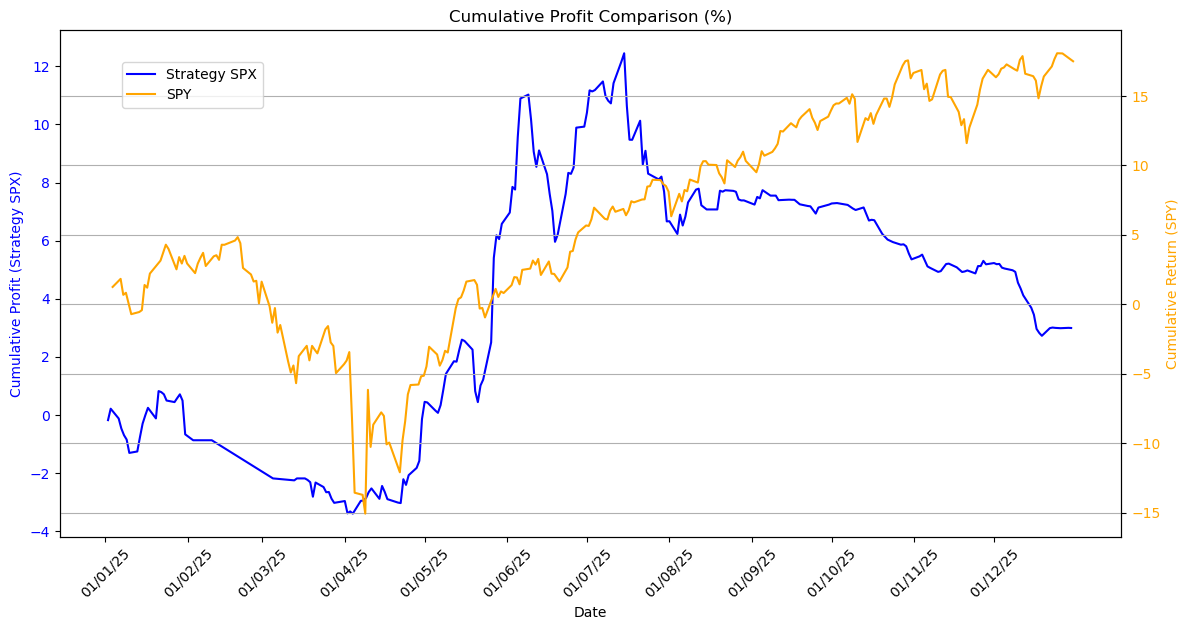

In [233]:
# plot df_spx_grouped e combined_data_spy usando due assi y diversi, con asse x datetime coerente
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea una colonna datetime per df_spx_grouped
df_spx_grouped['Date'] = pd.to_datetime(df_spx_grouped[['Year', 'Month', 'Day']])

# Plot strategia SPX sull'asse primario
ax1.plot(df_spx_grouped['Date'], df_spx_grouped['Cumulative_Profit']*100, label='Strategy SPX', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Profit (Strategy SPX)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot SPY sull'asse secondario
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Profit Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Tick dell'asse x: una data per ogni mese di SPY
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [234]:
df_us30_grouped

,Year,Month,Day,Profit_pct_100,Cumulative_Profit
0,2025,1,2,0.13129,0.001313
1,2025,1,3,0.01225,0.001436
2,2025,1,6,-3.40897,-0.032703
3,2025,1,7,-0.05720,-0.033256
4,2025,1,8,-0.21080,-0.035294
...,...,...,...,...,...
142,2025,12,22,0.11121,-0.030018
143,2025,12,24,-0.11710,-0.031154
144,2025,12,26,-0.11739,-0.032291
145,2025,12,29,-0.07124,-0.032980


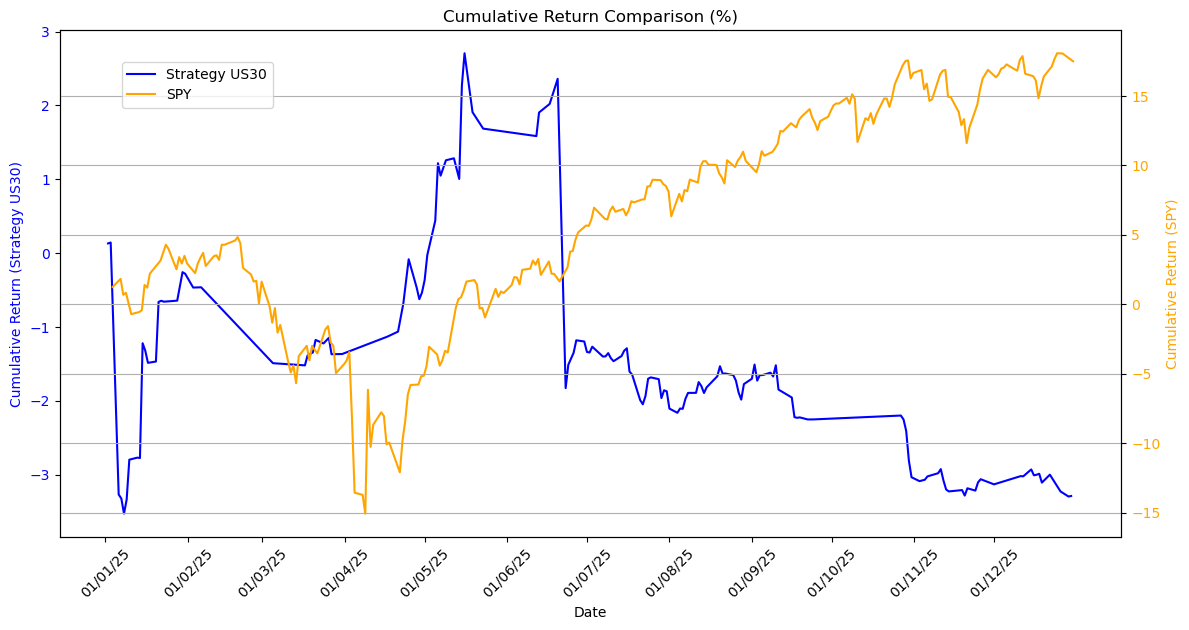

In [235]:
# Calcolo dei log return cumulativi per df_us30_grouped
df_us30_grouped['Date'] = pd.to_datetime(df_us30_grouped[['Year', 'Month', 'Day']])
df_us30_grouped['Cumulative_Return'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# Plot dei dati su due assi y diversi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primo dataset sull'asse y primario (x = datetime)
ax1.plot(
    df_us30_grouped['Date'],
    df_us30_grouped['Cumulative_Return']*100,
    label='Strategy US30',
    color='blue'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy US30)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondo dataset sull'asse y secondario
combined_data_spy.index = pd.to_datetime(combined_data_spy.index)
ax2 = ax1.twinx()
ax2.plot(
    combined_data_spy.index,
    combined_data_spy['cumulative_return']*100,
    label='SPY',
    color='orange'
)
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

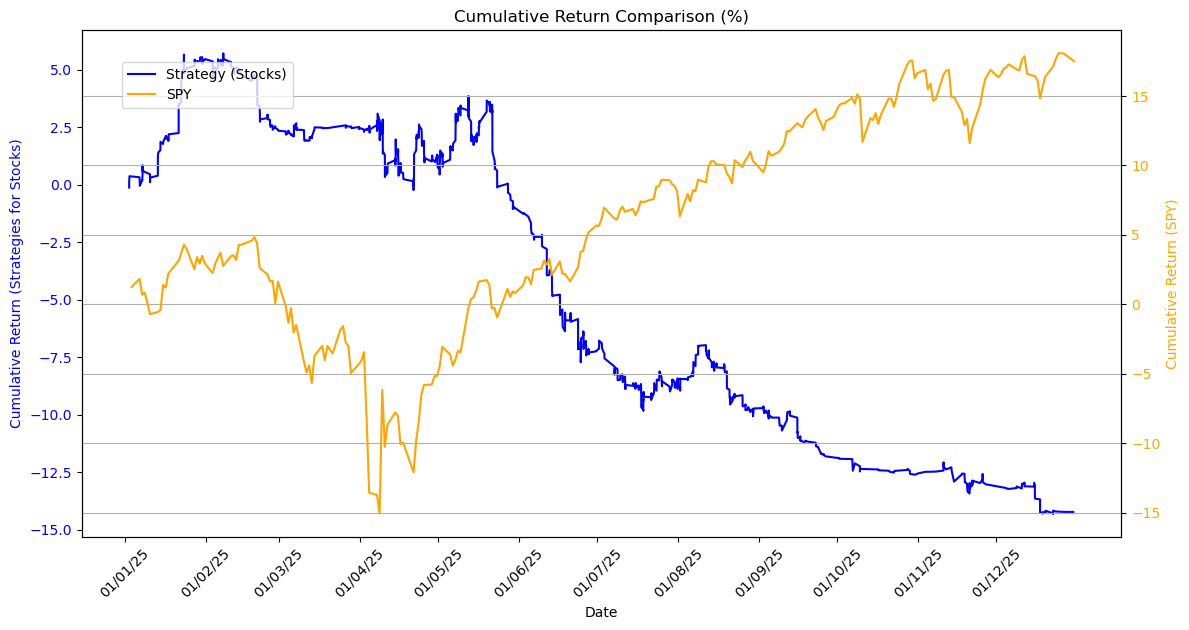

In [236]:
# plot cumulative return for df_stocks_sorted and combined_data_spy using due assi y diversi
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Strategy (Stocks) sull'asse primario
ax1.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Strategy (Stocks)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategies for Stocks)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crea un asse secondario per SPY
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [237]:
# create df copy
df_total_strategies = df_100_no_5ers.copy()

# sort df_total_strategies by Apri
df_total_strategies_sorted = df_total_strategies.sort_values(by='Apri')

# calculate cumulative return for df_total_strategies_sorted using log returns
df_total_strategies_sorted['Cumulative_Return'] = np.log(1 + df_total_strategies_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

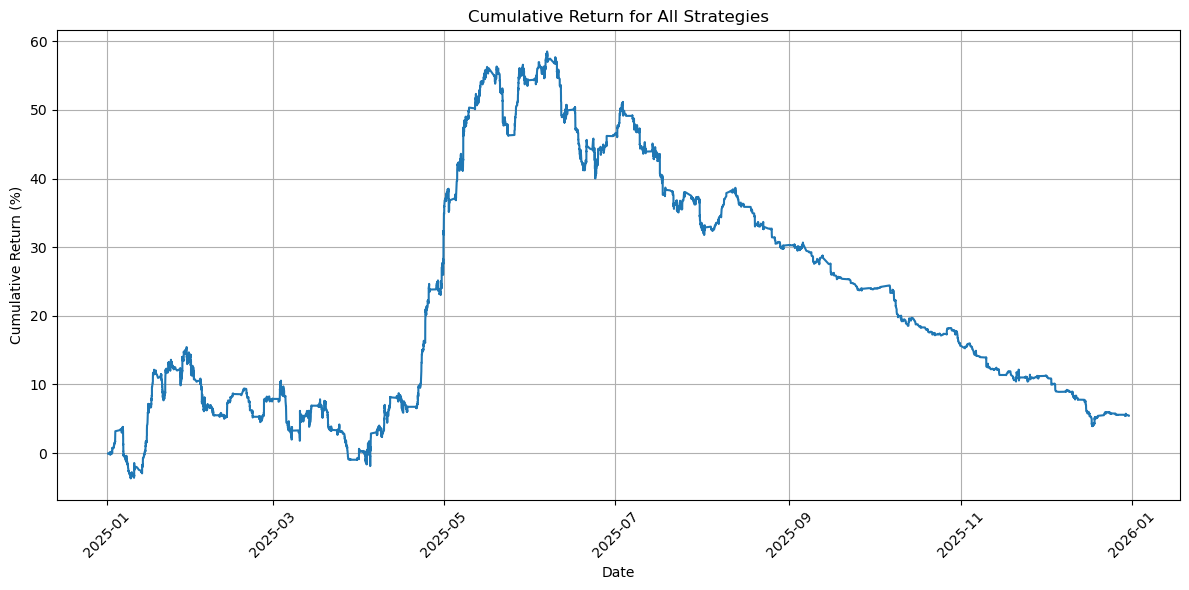

In [238]:
# plot df_total_strategies_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100)
plt.title('Cumulative Return for All Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

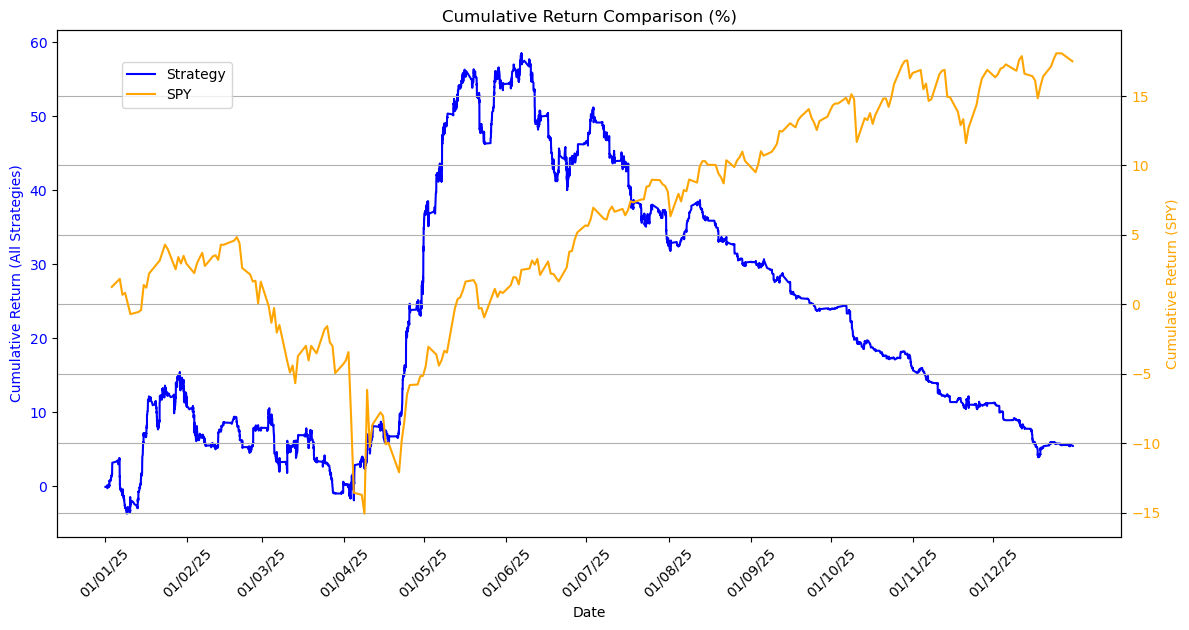

In [239]:
# plot df_total_strategies_sorted and combined_data_spy using two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (All Strategies)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [240]:
# df_total_strategies.info()

# drop na
combined_data_spy = combined_data_spy.dropna()

combined_data_spy.head()

,Close,daily_return,cumulative_return
datetime,,,
2025-01-03 17:30:00,591.95,0.012503,0.012503
2025-01-06 17:30:00,595.36,0.005761,0.018336
2025-01-07 17:30:00,588.63,-0.011304,0.006825
2025-01-08 17:30:00,589.49,0.001461,0.008296
2025-01-10 17:30:00,580.49,-0.015267,-0.007098


In [241]:
# Calculate the maximum drawdown of spy
daily_returns_spy = combined_data_spy['Close'].pct_change()

cumulative_returns_spy = (1 + daily_returns_spy).cumprod() # here in internet they add -1

cumulative_max_spy = cumulative_returns_spy.cummax()

drawdown_spy = (cumulative_returns_spy - cumulative_max_spy) / cumulative_max_spy

max_drawdown_spy = drawdown_spy.min()
print(f"Max Drawdown: {max_drawdown_spy:.2%}")

Max Drawdown: -19.00%


In [242]:
# # Ok, correct
# # plot cumulative_returns_spy
# plt.figure(figsize=(12, 6))
# plt.plot(cumulative_returns_spy)
# plt.title('Cumulative Returns for SPY')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

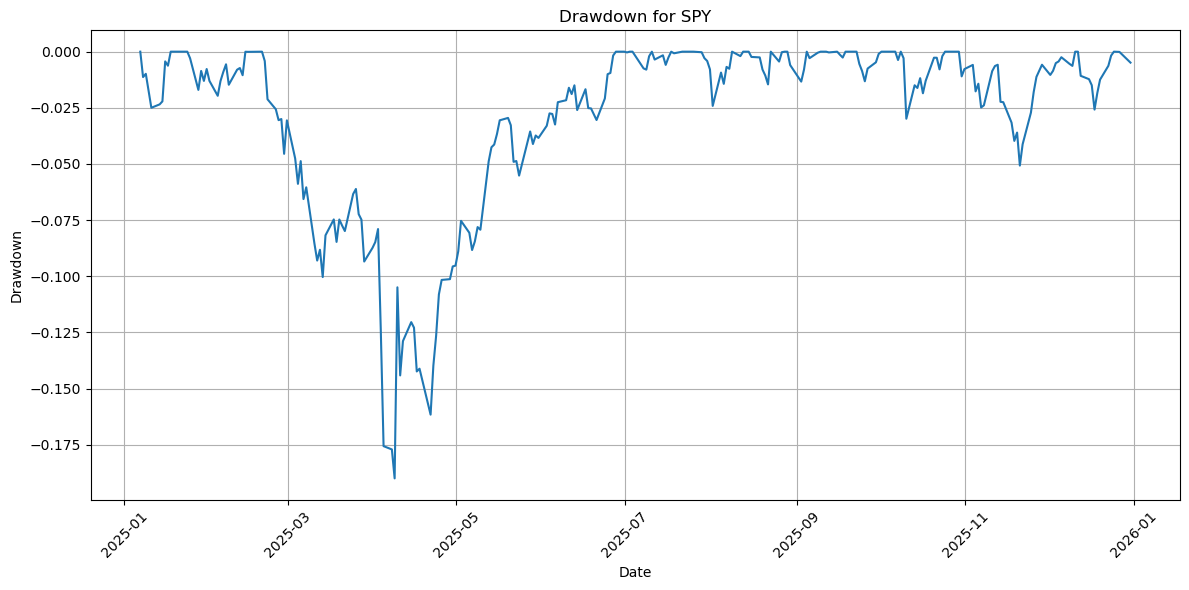

In [243]:
# plot drawdown_spy
plt.figure(figsize=(12, 6))
plt.plot(drawdown_spy)
plt.title('Drawdown for SPY')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [244]:
# 3
daily_returns_strategies = df_total_strategies_sorted.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
daily_returns_strategies = daily_returns_strategies.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
daily_returns_strategies['Date'] = pd.to_datetime(daily_returns_strategies[['Year', 'Month', 'Day']])

# drop Month	Year	Day
daily_returns_strategies = daily_returns_strategies.drop(columns=['Month', 'Year', 'Day'])

# set index to Date
daily_returns_strategies = daily_returns_strategies.set_index('Date')

daily_returns_strategies.head()

,Profit_pct_100
Date,
2025-01-01,0.12186
2025-01-02,0.59035
2025-01-03,2.43372
2025-01-05,0.27139
2025-01-06,-3.86898


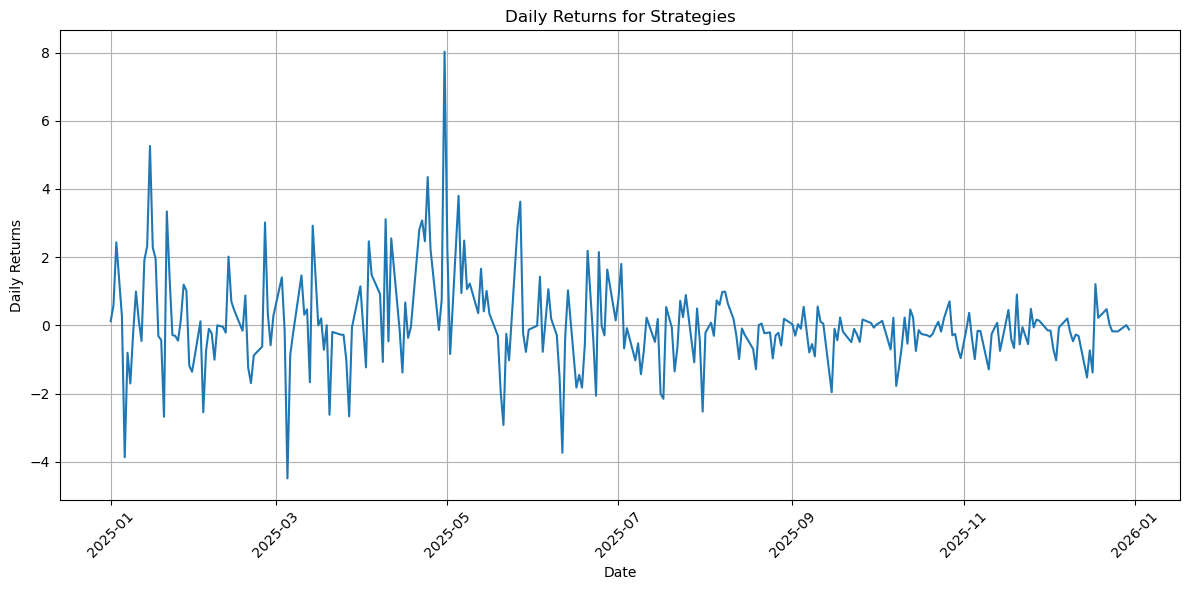

In [245]:
# plot Profit_pct_100
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_strategies.index, daily_returns_strategies['Profit_pct_100'])
plt.title('Daily Returns for Strategies')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Download here the csv daily_returns_spy and daily_returns_strategies for quantstats analysis

## Don't forget to change the code at the beginning of the notebook before downloading the csv files

In [246]:
# # Get paths from environment variables
# path_daily_returns_spy = os.getenv('path_daily_returns_spy')
# path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# # download daily_returns_spy and daily_returns_strategies to csv files
# daily_returns_spy.to_csv(path_daily_returns_spy, index=True, sep=';')
# daily_returns_strategies.to_csv(path_daily_returns_strategies, index=True, sep=';')

In [247]:
# df_total_strategies_sorted.head()

## Below cell can be used only if we use the quantstats version of data at the beginning of the notebook

In [248]:
# # Use only with quantstats version of the notebook

# cumulative_returns_strategies = (1 + daily_returns_strategies).cumprod()  # here in internet they add -1 

# cumulative_max_strategies = cumulative_returns_strategies.cummax()

# drawdown_strategies = (cumulative_returns_strategies - cumulative_max_strategies) / cumulative_max_strategies

# max_drawdown_strategies = drawdown_strategies.min().min()
# print(f"Max Drawdown: {max_drawdown_strategies:.2%}")
# # print(f"Max Drawdown: {max_drawdown_strategies:.2%}")

## Pyfolio analysis (to complete.. see separate notebook for the full analysis)

In [249]:
# from pyfolio.plotting import (plot_perf_stats, show_perf_stats)
# from pyfolio.timeseries import perf_stats

In [250]:
# # df_total_strategies keep only column Profit_pct_100 and drop na values
# df_total_strategies = df_total_strategies[['Profit_pct_100']].dropna()

# # df combined_data_spy keep only column daily_return and drop na values
# combined_data_spy = combined_data_spy[['daily_return']].dropna()

In [251]:
# df_total_strategies.head()
# combined_data_spy.sample(10)

In [252]:
# combined_data_spy.info()

In [253]:
# # remove nan values
# returns = df_total_strategies['Profit_pct_100']
# factor_returns = combined_data_spy['daily_return']

# perf_stats(returns=returns, factor_returns=factor_returns)


## Final Download

In [254]:
# # Get download path from environment variables
# path_prop_download = os.getenv('path_prop_download')

# # download the file as CSV
# df.to_csv(os.path.join(path_prop_download, 'full_db', '251231_PROP_full_history_db.csv'), index=False, sep=';')